In [701]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [702]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [703]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [704]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [705]:
df.shape

(1460, 81)

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [707]:
# Check for null column
nonl = df.nunique()
nonl[nonl==0]

Series([], dtype: int64)

In [708]:
df = df.rename(columns= lambda x: x.strip(), inplace=False)

In [709]:
df = df.drop_duplicates()

In [710]:
# Checking the percentage of missing values in each column
missing_val_cols_percnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_percnt[missing_val_cols_percnt!=0])
missing

,0
LotFrontage,17.74
Alley,93.77
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07


In [711]:
#Dropping columns with more than 90% missing values
df=df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [712]:
#Relpace missing values in FireplaceQu with NA
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [713]:
# Checking the percentage of missing values in each column again
missing_val_cols_percnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_percnt[missing_val_cols_percnt!=0])
missing

,0
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07
GarageType,5.55


In [714]:
# imputing missing values in LotFrontage

#check unique values of LotFrontage
df.LotFrontage.value_counts()


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [715]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

##### imputing all the missing values

In [716]:
df.MasVnrType = df.MasVnrType.fillna('None')
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())
df.BsmtQual = df.BsmtQual.fillna('NA')
df.BsmtCond = df.BsmtCond.fillna('NA')
df.BsmtExposure = df.BsmtExposure.fillna('No')
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])
df.GarageType = df.GarageType.fillna('NA')
df.GarageYrBlt = df.GarageYrBlt.fillna(0)
df.GarageFinish = df.GarageFinish.fillna('NA')
df.GarageQual = df.GarageQual.fillna('NA')
df.GarageCond = df.GarageCond.fillna('NA')

In [717]:
#check missing values again
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [718]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [719]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
df = df.astype(convert_dict)

In [720]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [721]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [722]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [723]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [724]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [725]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [726]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [727]:
#checking null values in categorical columns
catObjNull = df.select_dtypes(include='object')
missingCatObj = round(100*catObjNull.isnull().sum()/len(catObjNull.index),2)
missingCatObj = missingCatObj[missingCatObj!=0]
missingCatObj

Series([], dtype: float64)

##### dropping columns which have more than 80% data association with single column

In [728]:
def getAssocCols(data, percent):
    df1= data.copy()
    my_list= []
    catObjCol = df1.select_dtypes(include=['object'])
    for col in (catObjCol):
        if(df1[col].value_counts().max() > int(percent*len(df1.index)/100)):
            my_list.append(col)
    return my_list

columns = getAssocCols(data=df, percent=80)  
df = df.drop(columns, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [730]:
df.shape

(1460, 57)

In [731]:
#Calculating age of the house to reduce 2 columns and removing 2 columns
df['ageOfHouse'] = df.YrSold - df.YearBuilt
df = df.drop(columns=['YrSold','YearBuilt','Id'])

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

## Creating Dummy Variables

In [733]:
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')
df = pd.concat([df,MSSubClass_df],axis=1)
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')
df = pd.concat([df,LotShape_df],axis=1)
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')
df = pd.concat([df,LotConfig_df],axis=1)
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')
df = pd.concat([df,MSZoning_df],axis=1)
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')
df = pd.concat([df,Neighborhood_df],axis=1)
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')
df = pd.concat([df,RoofStyle_df],axis=1)
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')
df = pd.concat([df,Exterior1st_df],axis=1)
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
df = pd.concat([df,Exterior2nd_df],axis=1)
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')
df = pd.concat([df,MasVnrType_df],axis=1)
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')
df = pd.concat([df,Foundation_df],axis=1)
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')
df = pd.concat([df,GarageType_df],axis=1)
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()   

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,

In [734]:
df.shape

(1460, 155)

In [735]:
df.shape

(1460, 155)

In [736]:
df1 = df.copy()

In [737]:
df = df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                      'GarageType', 'GarageFinish'])

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 142 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(100)
memory usage: 633.0 KB


#### Test Train Split

In [739]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 142)
(439, 142)


#### Scaling the numerical columns

In [740]:
scaler = StandardScaler()

nums = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','ExterQual','BsmtQual','BsmtExposure',
        'BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','LowQualFinSF',
        'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
        'TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
        'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','SalePrice','ageOfHouse']

df_train[nums] = scaler.fit_transform(df_train[nums])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,1.004170,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,-0.855161,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,-0.804567,1.961757,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

### Training Model

In [741]:
X_train = df_train
y_train = df_train.pop('SalePrice')

In [742]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.

In [743]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 141 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(41), uint8(100)
memory usage: 434.7 KB


In [744]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=141)

#### Training the model

In [745]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [746]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 34),
 ('LotArea', False, 5),
 ('OverallQual', True, 1),
 ('OverallCond', False, 55),
 ('YearRemodAdd', False, 91),
 ('MasVnrArea', False, 16),
 ('ExterQual', False, 7),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 85),
 ('BsmtFinSF1', False, 6),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 9),
 ('TotalBsmtSF', False, 12),
 ('HeatingQC', False, 107),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('BsmtHalfBath', False, 40),
 ('FullBath', False, 49),
 ('HalfBath', False, 96),
 ('BedroomAbvGr', False, 60),
 ('KitchenAbvGr', False, 61),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 68),
 ('Fireplaces', False, 76),
 ('FireplaceQu', False, 97),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 92),
 ('GarageArea', False, 20),
 ('WoodDeckSF', False, 93),
 ('OpenPorchSF', False, 104),
 ('EnclosedPorch', False, 95),
 ('3SsnPorch', False, 48),

In [747]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenQual', 'GarageYrBlt', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3',
       'MSZoning_RL', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Foundation_Slab',
       'Foundation_Stone', 'GarageType_Basment', 'GarageType_NA',
       'GarageFinish_NA'],
      dtype='object')

In [748]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=106)

##### Building the model

In [749]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:42   Log-Likelihood:                -522.29
No. Observations:                1021   AIC:                             1115.
Df Residuals:                     986   BIC:                             1287.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4045      0.087     -4.650      0.000      -0.575      -0.234
OverallQual              0.2082      0.024      8.701      0.000       0.161       0.255
BsmtQual                 0.1155      0.022      5.151      0.000       0.071       0.159
BsmtExposure             0.1329      0.015      8.998      0.000       0.104       0.162
1stFlrSF                 0.4062      0.112      3.614      0.000       0.186       0.627
2ndFlrSF                 0.3493      0.122      2.863      0.004       0.110       0.589
GrLivArea               -0.1124      0.146     -0.767      0.443      -0.400       0.175
KitchenQual              0.1111      0.019      5.846      0.000       0.074       0.148
GarageYrBlt              1.0150      0.361      2.814      0.005       0.307       1.723
MSSubClass_90           -0.2698      0.074     -3.670      0.000      -0.414      -0.126
MSSubClass_120          -0.2918      0.061     -4.776      0.000      -0.412      -0.172
MSSubClass_160          -0.4886      0.087     -5.640      0.000      -0.659      -0.319
MSSubClass_190          -0.1789      0.088     -2.032      0.042      -0.352      -0.006
LotShape_IR3            -0.2858      0.141     -2.034      0.042      -0.561      -0.010
MSZoning_RL              0.1360      0.039      3.501      0.000       0.060       0.212
Neighborhood_BrDale      0.2876      0.147      1.958      0.051      -0.001       0.576
Neighborhood_Crawfor     0.3786      0.078      4.825      0.000       0.225       0.533
Neighborhood_Edwards    -0.1439      0.053     -2.704      0.007      -0.248      -0.039
Neighborhood_NoRidge     0.8134      0.080     10.182      0.000       0.657       0.970
Neighborhood_NridgHt     0.6635      0.066     10.099      0.000       0.535       0.792
Neighborhood_Somerst     0.4421      0.069      6.449      0.000       0.308       0.577
Neighborhood_StoneBr     0.5327      0.123      4.318      0.000       0.291       0.775
Neighborhood_Veenker     0.3437      0.128      2.682      0.007       0.092       0.595
Exterior1st_BrkComm     -0.6431      0.393     -1.638      0.102      -1.414       0.128
Exterior1st_BrkFace      0.2651      0.081      3.262      0.001       0.106       0.425
Exterior1st_CBlock      -0.2096      0.412     -0.509      0.611      -1.018       0.599
Exterior1st_ImStucc     -0.5801      0.447     -1.298      0.195      -1.457       0.297
Exterior2nd_Brk Cmn      0.3968      0.253      1.570      0.117      -0.099       0.893
Exterior2nd_ImStucc      0.2710      0.158      1.710      0.088      -0.040       0.582
Exterior2nd_Stone        0.1431      0.247      0.580      0.562      -0.341       0.627
Exterior2nd_Stucco      -0.2682      0.097     -2.755      0.006      -0.459      -0.077
Foundation_Slab          0.2929      0.128      2.283    

In [750]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
35,GarageFinish_NA,inf
34,GarageType_NA,inf
8,GarageYrBlt,787.94
6,GrLivArea,129.84
5,2ndFlrSF,90.06
4,1stFlrSF,76.49
0,const,45.82
1,OverallQual,3.46
2,BsmtQual,3.04
7,KitchenQual,2.19


In [751]:
## GarageType_NA has Inf VIF Value, hence dropping it
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [752]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -522.29
No. Observations:                1021   AIC:                             1115.
Df Residuals:                     986   BIC:                             1287.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4045      0.087     -4.650      0.000      -0.575      -0.234
OverallQual              0.2082      0.024      8.701      0.000       0.161       0.255
BsmtQual                 0.1155      0.022      5.151      0.000       0.071       0.159
BsmtExposure             0.1329      0.015      8.998      0.000       0.104       0.162
1stFlrSF                 0.4062      0.112      3.614      0.000       0.186       0.627
2ndFlrSF                 0.3493      0.122      2.863      0.004       0.110       0.589
GrLivArea               -0.1124      0.146     -0.767      0.443      -0.400       0.175
KitchenQual              0.1111      0.019      5.846      0.000       0.074       0.148
GarageYrBlt              1.0150      0.361      2.814      0.005       0.307       1.723
MSSubClass_90           -0.2698      0.074     -3.670      0.000      -0.414      -0.126
MSSubClass_120          -0.2918      0.061     -4.776      0.000      -0.412      -0.172
MSSubClass_160          -0.4886      0.087     -5.640      0.000      -0.659      -0.319
MSSubClass_190          -0.1789      0.088     -2.032      0.042      -0.352      -0.006
LotShape_IR3            -0.2858      0.141     -2.034      0.042      -0.561      -0.010
MSZoning_RL              0.1360      0.039      3.501      0.000       0.060       0.212
Neighborhood_BrDale      0.2876      0.147      1.958      0.051      -0.001       0.576
Neighborhood_Crawfor     0.3786      0.078      4.825      0.000       0.225       0.533
Neighborhood_Edwards    -0.1439      0.053     -2.704      0.007      -0.248      -0.039
Neighborhood_NoRidge     0.8134      0.080     10.182      0.000       0.657       0.970
Neighborhood_NridgHt     0.6635      0.066     10.099      0.000       0.535       0.792
Neighborhood_Somerst     0.4421      0.069      6.449      0.000       0.308       0.577
Neighborhood_StoneBr     0.5327      0.123      4.318      0.000       0.291       0.775
Neighborhood_Veenker     0.3437      0.128      2.682      0.007       0.092       0.595
Exterior1st_BrkComm     -0.6431      0.393     -1.638      0.102      -1.414       0.128
Exterior1st_BrkFace      0.2651      0.081      3.262      0.001       0.106       0.425
Exterior1st_CBlock      -0.2096      0.412     -0.509      0.611      -1.018       0.599
Exterior1st_ImStucc     -0.5801      0.447     -1.298      0.195      -1.457       0.297
Exterior2nd_Brk Cmn      0.3968      0.253      1.570      0.117      -0.099       0.893
Exterior2nd_ImStucc      0.2710      0.158      1.710      0.088      -0.040       0.582
Exterior2nd_Stone        0.1431      0.247      0.580      0.562      -0.341       0.627
Exterior2nd_Stucco      -0.2682      0.097     -2.755      0.006      -0.459      -0.077
Foundation_Slab          0.2929      0.128      2.283    

In [753]:
# Exterior1st_CBlock has high p value hence dropping it
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

In [754]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     153.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -522.42
No. Observations:                1021   AIC:                             1113.
Df Residuals:                     987   BIC:                             1280.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4042      0.087     -4.648      0.000      -0.575      -0.234
OverallQual              0.2089      0.024      8.748      0.000       0.162       0.256
BsmtQual                 0.1154      0.022      5.151      0.000       0.071       0.159
BsmtExposure             0.1329      0.015      9.003      0.000       0.104       0.162
1stFlrSF                 0.4058      0.112      3.612      0.000       0.185       0.626
2ndFlrSF                 0.3486      0.122      2.859      0.004       0.109       0.588
GrLivArea               -0.1120      0.146     -0.765      0.444      -0.399       0.175
KitchenQual              0.1111      0.019      5.848      0.000       0.074       0.148
GarageYrBlt              1.0142      0.361      2.812      0.005       0.306       1.722
MSSubClass_90           -0.2693      0.073     -3.666      0.000      -0.414      -0.125
MSSubClass_120          -0.2920      0.061     -4.783      0.000      -0.412      -0.172
MSSubClass_160          -0.4884      0.087     -5.639      0.000      -0.658      -0.318
MSSubClass_190          -0.1784      0.088     -2.027      0.043      -0.351      -0.006
LotShape_IR3            -0.2856      0.140     -2.034      0.042      -0.561      -0.010
MSZoning_RL              0.1355      0.039      3.491      0.001       0.059       0.212
Neighborhood_BrDale      0.2872      0.147      1.956      0.051      -0.001       0.575
Neighborhood_Crawfor     0.3788      0.078      4.829      0.000       0.225       0.533
Neighborhood_Edwards    -0.1433      0.053     -2.695      0.007      -0.248      -0.039
Neighborhood_NoRidge     0.8135      0.080     10.187      0.000       0.657       0.970
Neighborhood_NridgHt     0.6630      0.066     10.097      0.000       0.534       0.792
Neighborhood_Somerst     0.4416      0.069      6.445      0.000       0.307       0.576
Neighborhood_StoneBr     0.5322      0.123      4.316      0.000       0.290       0.774
Neighborhood_Veenker     0.3437      0.128      2.683      0.007       0.092       0.595
Exterior1st_BrkComm     -0.6432      0.393     -1.638      0.102      -1.414       0.127
Exterior1st_BrkFace      0.2652      0.081      3.263      0.001       0.106       0.425
Exterior1st_ImStucc     -0.5810      0.447     -1.301      0.194      -1.458       0.296
Exterior2nd_Brk Cmn      0.3971      0.253      1.572      0.116      -0.099       0.893
Exterior2nd_ImStucc      0.2712      0.158      1.712      0.087      -0.040       0.582
Exterior2nd_Stone        0.1434      0.247      0.582      0.561      -0.340       0.627
Exterior2nd_Stucco      -0.2680      0.097     -2.754      0.006      -0.459      -0.077
Foundation_Slab          0.2934      0.128      2.287      0.022       0.042       0.545
Foundation_Stone         0.2486      0.242      1.025    

In [755]:
# Exterior2nd_Stone has high p value, hence dropping it
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -522.60
No. Observations:                1021   AIC:                             1111.
Df Residuals:                     988   BIC:                             1274.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4043      0.087     -4.651      0.000      -0.575      -0.234
OverallQual              0.2084      0.024      8.736      0.000       0.162       0.255
BsmtQual                 0.1143      0.022      5.122      0.000       0.071       0.158
BsmtExposure             0.1328      0.015      9.001      0.000       0.104       0.162
1stFlrSF                 0.4052      0.112      3.608      0.000       0.185       0.626
2ndFlrSF                 0.3478      0.122      2.854      0.004       0.109       0.587
GrLivArea               -0.1114      0.146     -0.762      0.447      -0.399       0.176
KitchenQual              0.1122      0.019      5.936      0.000       0.075       0.149
GarageYrBlt              1.0126      0.361      2.809      0.005       0.305       1.720
MSSubClass_90           -0.2634      0.073     -3.621      0.000      -0.406      -0.121
MSSubClass_120          -0.2921      0.061     -4.786      0.000      -0.412      -0.172
MSSubClass_160          -0.4880      0.087     -5.637      0.000      -0.658      -0.318
MSSubClass_190          -0.1783      0.088     -2.026      0.043      -0.351      -0.006
LotShape_IR3            -0.2846      0.140     -2.027      0.043      -0.560      -0.009
MSZoning_RL              0.1361      0.039      3.509      0.000       0.060       0.212
Neighborhood_BrDale      0.2874      0.147      1.958      0.051      -0.001       0.575
Neighborhood_Crawfor     0.3832      0.078      4.909      0.000       0.230       0.536
Neighborhood_Edwards    -0.1443      0.053     -2.716      0.007      -0.249      -0.040
Neighborhood_NoRidge     0.8146      0.080     10.206      0.000       0.658       0.971
Neighborhood_NridgHt     0.6636      0.066     10.110      0.000       0.535       0.792
Neighborhood_Somerst     0.4423      0.068      6.458      0.000       0.308       0.577
Neighborhood_StoneBr     0.5328      0.123      4.323      0.000       0.291       0.775
Neighborhood_Veenker     0.3431      0.128      2.680      0.007       0.092       0.594
Exterior1st_BrkComm     -0.6441      0.392     -1.641      0.101      -1.414       0.126
Exterior1st_BrkFace      0.2681      0.081      3.307      0.001       0.109       0.427
Exterior1st_ImStucc     -0.5807      0.447     -1.301      0.194      -1.457       0.296
Exterior2nd_Brk Cmn      0.3966      0.253      1.571      0.117      -0.099       0.892
Exterior2nd_ImStucc      0.2702      0.158      1.706      0.088      -0.041       0.581
Exterior2nd_Stucco      -0.2694      0.097     -2.771      0.006      -0.460      -0.079
Foundation_Slab          0.2943      0.128      2.296      0.022       0.043       0.546
Foundation_Stone         0.2487      0.242      1.026      0.305      -0.227       0.724
GarageType_Basment      -0.3060      0.123     -2.488    

In [756]:
# GrLivArea has high p value, hence dropping it
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -522.90
No. Observations:                1021   AIC:                             1110.
Df Residuals:                     989   BIC:                             1268.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4047      0.087     -4.657      0.000      -0.575      -0.234
OverallQual              0.2087      0.024      8.753      0.000       0.162       0.256
BsmtQual                 0.1146      0.022      5.134      0.000       0.071       0.158
BsmtExposure             0.1333      0.015      9.049      0.000       0.104       0.162
1stFlrSF                 0.3209      0.018     17.413      0.000       0.285       0.357
2ndFlrSF                 0.2559      0.017     15.291      0.000       0.223       0.289
KitchenQual              0.1127      0.019      5.970      0.000       0.076       0.150
GarageYrBlt              1.0092      0.360      2.800      0.005       0.302       1.716
MSSubClass_90           -0.2596      0.073     -3.578      0.000      -0.402      -0.117
MSSubClass_120          -0.2918      0.061     -4.781      0.000      -0.412      -0.172
MSSubClass_160          -0.4884      0.087     -5.643      0.000      -0.658      -0.319
MSSubClass_190          -0.1801      0.088     -2.048      0.041      -0.353      -0.008
LotShape_IR3            -0.2830      0.140     -2.017      0.044      -0.558      -0.008
MSZoning_RL              0.1377      0.039      3.555      0.000       0.062       0.214
Neighborhood_BrDale      0.2907      0.147      1.982      0.048       0.003       0.579
Neighborhood_Crawfor     0.3821      0.078      4.897      0.000       0.229       0.535
Neighborhood_Edwards    -0.1414      0.053     -2.669      0.008      -0.245      -0.037
Neighborhood_NoRidge     0.8164      0.080     10.236      0.000       0.660       0.973
Neighborhood_NridgHt     0.6638      0.066     10.115      0.000       0.535       0.793
Neighborhood_Somerst     0.4431      0.068      6.473      0.000       0.309       0.577
Neighborhood_StoneBr     0.5328      0.123      4.323      0.000       0.291       0.775
Neighborhood_Veenker     0.3428      0.128      2.678      0.008       0.092       0.594
Exterior1st_BrkComm     -0.6466      0.392     -1.648      0.100      -1.417       0.123
Exterior1st_BrkFace      0.2694      0.081      3.324      0.001       0.110       0.428
Exterior1st_ImStucc     -0.5811      0.446     -1.302      0.193      -1.457       0.295
Exterior2nd_Brk Cmn      0.3981      0.252      1.577      0.115      -0.097       0.894
Exterior2nd_ImStucc      0.2697      0.158      1.704      0.089      -0.041       0.580
Exterior2nd_Stucco      -0.2715      0.097     -2.793      0.005      -0.462      -0.081
Foundation_Slab          0.2953      0.128      2.304      0.021       0.044       0.547
Foundation_Stone         0.2525      0.242      1.042      0.298      -0.223       0.728
GarageType_Basment      -0.3057      0.123     -2.486      0.013      -0.547      -0.064
GarageFinish_NA          4.3008      1.556      2.764    

In [757]:
# Foundation_Stone has high p value, hence dropping it
X_train_new = X_train_new.drop(['Foundation_Stone'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -523.46
No. Observations:                1021   AIC:                             1109.
Df Residuals:                     990   BIC:                             1262.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3973      0.087     -4.587      0.000      -0.567      -0.227
OverallQual              0.2096      0.024      8.793      0.000       0.163       0.256
BsmtQual                 0.1138      0.022      5.100      0.000       0.070       0.158
BsmtExposure             0.1337      0.015      9.078      0.000       0.105       0.163
1stFlrSF                 0.3207      0.018     17.405      0.000       0.285       0.357
2ndFlrSF                 0.2564      0.017     15.325      0.000       0.224       0.289
KitchenQual              0.1131      0.019      5.993      0.000       0.076       0.150
GarageYrBlt              0.9852      0.360      2.739      0.006       0.279       1.691
MSSubClass_90           -0.2594      0.073     -3.575      0.000      -0.402      -0.117
MSSubClass_120          -0.2910      0.061     -4.769      0.000      -0.411      -0.171
MSSubClass_160          -0.4886      0.087     -5.646      0.000      -0.658      -0.319
MSSubClass_190          -0.1711      0.088     -1.956      0.051      -0.343       0.001
LotShape_IR3            -0.2841      0.140     -2.025      0.043      -0.560      -0.009
MSZoning_RL              0.1367      0.039      3.529      0.000       0.061       0.213
Neighborhood_BrDale      0.2891      0.147      1.971      0.049       0.001       0.577
Neighborhood_Crawfor     0.3783      0.078      4.853      0.000       0.225       0.531
Neighborhood_Edwards    -0.1425      0.053     -2.690      0.007      -0.246      -0.039
Neighborhood_NoRidge     0.8153      0.080     10.223      0.000       0.659       0.972
Neighborhood_NridgHt     0.6636      0.066     10.112      0.000       0.535       0.792
Neighborhood_Somerst     0.4427      0.068      6.467      0.000       0.308       0.577
Neighborhood_StoneBr     0.5317      0.123      4.314      0.000       0.290       0.774
Neighborhood_Veenker     0.3423      0.128      2.674      0.008       0.091       0.593
Exterior1st_BrkComm     -0.6443      0.392     -1.642      0.101      -1.414       0.126
Exterior1st_BrkFace      0.2684      0.081      3.312      0.001       0.109       0.427
Exterior1st_ImStucc     -0.5789      0.446     -1.297      0.195      -1.455       0.297
Exterior2nd_Brk Cmn      0.3976      0.252      1.575      0.116      -0.098       0.893
Exterior2nd_ImStucc      0.2687      0.158      1.698      0.090      -0.042       0.579
Exterior2nd_Stucco      -0.2603      0.097     -2.694      0.007      -0.450      -0.071
Foundation_Slab          0.2918      0.128      2.278      0.023       0.040       0.543
GarageType_Basment      -0.3059      0.123     -2.488      0.013      -0.547      -0.065
GarageFinish_NA          4.1951      1.553      2.702      0.007       1.148       7.242
=========================================================

In [758]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,GarageYrBlt,784.52
30,GarageFinish_NA,770.67
0,const,45.51
1,OverallQual,3.45
2,BsmtQual,3.02
6,KitchenQual,2.16
4,1stFlrSF,2.06
10,MSSubClass_160,1.95
25,Exterior2nd_Brk Cmn,1.88
22,Exterior1st_BrkComm,1.83


In [759]:
# GarageYrBlt has high VIF, hence dropping it
X_train_new = X_train_new.drop(['GarageYrBlt'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -527.31
No. Observations:                1021   AIC:                             1115.
Df Residuals:                     991   BIC:                             1262.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1816      0.036     -5.023      0.000      -0.253      -0.111
OverallQual              0.2176      0.024      9.170      0.000       0.171       0.264
BsmtQual                 0.1330      0.021      6.260      0.000       0.091       0.175
BsmtExposure             0.1349      0.015      9.129      0.000       0.106       0.164
1stFlrSF                 0.3188      0.018     17.258      0.000       0.283       0.355
2ndFlrSF                 0.2552      0.017     15.210      0.000       0.222       0.288
KitchenQual              0.1247      0.018      6.758      0.000       0.089       0.161
MSSubClass_90           -0.2464      0.073     -3.392      0.001      -0.389      -0.104
MSSubClass_120          -0.2647      0.060     -4.379      0.000      -0.383      -0.146
MSSubClass_160          -0.4635      0.086     -5.368      0.000      -0.633      -0.294
MSSubClass_190          -0.1760      0.088     -2.005      0.045      -0.348      -0.004
LotShape_IR3            -0.2616      0.141     -1.861      0.063      -0.537       0.014
MSZoning_RL              0.1602      0.038      4.227      0.000       0.086       0.235
Neighborhood_BrDale      0.2922      0.147      1.986      0.047       0.003       0.581
Neighborhood_Crawfor     0.3339      0.076      4.365      0.000       0.184       0.484
Neighborhood_Edwards    -0.1473      0.053     -2.773      0.006      -0.252      -0.043
Neighborhood_NoRidge     0.8205      0.080     10.257      0.000       0.663       0.977
Neighborhood_NridgHt     0.6618      0.066     10.051      0.000       0.533       0.791
Neighborhood_Somerst     0.4775      0.067      7.074      0.000       0.345       0.610
Neighborhood_StoneBr     0.5088      0.123      4.125      0.000       0.267       0.751
Neighborhood_Veenker     0.3317      0.128      2.584      0.010       0.080       0.584
Exterior1st_BrkComm     -0.6302      0.394     -1.601      0.110      -1.403       0.142
Exterior1st_BrkFace      0.2399      0.081      2.975      0.003       0.082       0.398
Exterior1st_ImStucc     -0.5662      0.448     -1.264      0.207      -1.445       0.313
Exterior2nd_Brk Cmn      0.3730      0.253      1.473      0.141      -0.124       0.870
Exterior2nd_ImStucc      0.2550      0.159      1.607      0.108      -0.056       0.567
Exterior2nd_Stucco      -0.2885      0.096     -2.994      0.003      -0.478      -0.099
Foundation_Slab          0.3714      0.125      2.967      0.003       0.126       0.617
GarageType_Basment      -0.3262      0.123     -2.649      0.008      -0.568      -0.085
GarageFinish_NA         -0.0547      0.060     -0.907      0.364      -0.173       0.064
==============================================================================
Omnibus:                      294.723   Durbin-Watson:             

In [760]:
# GarageFinish_NA hash high VIF and p value, hence dropping it
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -527.74
No. Observations:                1021   AIC:                             1113.
Df Residuals:                     992   BIC:                             1256.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1860      0.036     -5.195      0.000      -0.256      -0.116
OverallQual              0.2194      0.024      9.276      0.000       0.173       0.266
BsmtQual                 0.1324      0.021      6.236      0.000       0.091       0.174
BsmtExposure             0.1346      0.015      9.112      0.000       0.106       0.164
1stFlrSF                 0.3198      0.018     17.337      0.000       0.284       0.356
2ndFlrSF                 0.2556      0.017     15.235      0.000       0.223       0.288
KitchenQual              0.1255      0.018      6.811      0.000       0.089       0.162
MSSubClass_90           -0.2557      0.072     -3.557      0.000      -0.397      -0.115
MSSubClass_120          -0.2627      0.060     -4.349      0.000      -0.381      -0.144
MSSubClass_160          -0.4604      0.086     -5.336      0.000      -0.630      -0.291
MSSubClass_190          -0.1863      0.087     -2.140      0.033      -0.357      -0.015
LotShape_IR3            -0.2604      0.141     -1.853      0.064      -0.536       0.015
MSZoning_RL              0.1633      0.038      4.328      0.000       0.089       0.237
Neighborhood_BrDale      0.2904      0.147      1.974      0.049       0.002       0.579
Neighborhood_Crawfor     0.3347      0.076      4.377      0.000       0.185       0.485
Neighborhood_Edwards    -0.1547      0.052     -2.946      0.003      -0.258      -0.052
Neighborhood_NoRidge     0.8178      0.080     10.232      0.000       0.661       0.975
Neighborhood_NridgHt     0.6586      0.066     10.018      0.000       0.530       0.788
Neighborhood_Somerst     0.4784      0.067      7.088      0.000       0.346       0.611
Neighborhood_StoneBr     0.5052      0.123      4.098      0.000       0.263       0.747
Neighborhood_Veenker     0.3318      0.128      2.585      0.010       0.080       0.584
Exterior1st_BrkComm     -0.6191      0.393     -1.574      0.116      -1.391       0.153
Exterior1st_BrkFace      0.2388      0.081      2.963      0.003       0.081       0.397
Exterior1st_ImStucc     -0.5684      0.448     -1.269      0.205      -1.447       0.310
Exterior2nd_Brk Cmn      0.3719      0.253      1.469      0.142      -0.125       0.869
Exterior2nd_ImStucc      0.2576      0.159      1.623      0.105      -0.054       0.569
Exterior2nd_Stucco      -0.2876      0.096     -2.984      0.003      -0.477      -0.098
Foundation_Slab          0.3744      0.125      2.992      0.003       0.129       0.620
GarageType_Basment      -0.3213      0.123     -2.612      0.009      -0.563      -0.080
==============================================================================
Omnibus:                      296.129   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22300.49

In [761]:
# Dropping Exterior1st_ImStucc due to high p value
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -528.56
No. Observations:                1021   AIC:                             1113.
Df Residuals:                     993   BIC:                             1251.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1862      0.036     -5.199      0.000      -0.257      -0.116
OverallQual              0.2179      0.024      9.222      0.000       0.172       0.264
BsmtQual                 0.1322      0.021      6.224      0.000       0.090       0.174
BsmtExposure             0.1360      0.015      9.231      0.000       0.107       0.165
1stFlrSF                 0.3205      0.018     17.383      0.000       0.284       0.357
2ndFlrSF                 0.2577      0.017     15.429      0.000       0.225       0.290
KitchenQual              0.1257      0.018      6.817      0.000       0.090       0.162
MSSubClass_90           -0.2554      0.072     -3.552      0.000      -0.397      -0.114
MSSubClass_120          -0.2598      0.060     -4.303      0.000      -0.378      -0.141
MSSubClass_160          -0.4601      0.086     -5.332      0.000      -0.629      -0.291
MSSubClass_190          -0.1884      0.087     -2.164      0.031      -0.359      -0.018
LotShape_IR3            -0.2624      0.141     -1.867      0.062      -0.538       0.013
MSZoning_RL              0.1641      0.038      4.349      0.000       0.090       0.238
Neighborhood_BrDale      0.2970      0.147      2.020      0.044       0.008       0.586
Neighborhood_Crawfor     0.3336      0.076      4.361      0.000       0.183       0.484
Neighborhood_Edwards    -0.1556      0.053     -2.964      0.003      -0.259      -0.053
Neighborhood_NoRidge     0.8029      0.079     10.152      0.000       0.648       0.958
Neighborhood_NridgHt     0.6581      0.066     10.008      0.000       0.529       0.787
Neighborhood_Somerst     0.4792      0.068      7.099      0.000       0.347       0.612
Neighborhood_StoneBr     0.5039      0.123      4.086      0.000       0.262       0.746
Neighborhood_Veenker     0.3300      0.128      2.570      0.010       0.078       0.582
Exterior1st_BrkComm     -0.6170      0.394     -1.568      0.117      -1.389       0.155
Exterior1st_BrkFace      0.2394      0.081      2.969      0.003       0.081       0.398
Exterior2nd_Brk Cmn      0.3713      0.253      1.466      0.143      -0.126       0.868
Exterior2nd_ImStucc      0.1874      0.149      1.259      0.208      -0.105       0.479
Exterior2nd_Stucco      -0.2886      0.096     -2.994      0.003      -0.478      -0.099
Foundation_Slab          0.3726      0.125      2.977      0.003       0.127       0.618
GarageType_Basment      -0.3224      0.123     -2.620      0.009      -0.564      -0.081
==============================================================================
Omnibus:                      295.053   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22844.741
Skew:                          -0.280   Prob(JB):                         0.00
Kurtosis

In [762]:
#Dropping Exterior2nd_ImStucc due to high p value
X_train_new = X_train_new.drop(['Exterior2nd_ImStucc'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -529.38
No. Observations:                1021   AIC:                             1113.
Df Residuals:                     994   BIC:                             1246.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1860      0.036     -5.191      0.000      -0.256      -0.116
OverallQual              0.2175      0.024      9.203      0.000       0.171       0.264
BsmtQual                 0.1315      0.021      6.193      0.000       0.090       0.173
BsmtExposure             0.1374      0.015      9.348      0.000       0.109       0.166
1stFlrSF                 0.3210      0.018     17.404      0.000       0.285       0.357
2ndFlrSF                 0.2575      0.017     15.416      0.000       0.225       0.290
KitchenQual              0.1263      0.018      6.852      0.000       0.090       0.163
MSSubClass_90           -0.2519      0.072     -3.504      0.000      -0.393      -0.111
MSSubClass_120          -0.2570      0.060     -4.258      0.000      -0.375      -0.139
MSSubClass_160          -0.4579      0.086     -5.306      0.000      -0.627      -0.289
MSSubClass_190          -0.1893      0.087     -2.174      0.030      -0.360      -0.018
LotShape_IR3            -0.2643      0.141     -1.880      0.060      -0.540       0.012
MSZoning_RL              0.1653      0.038      4.381      0.000       0.091       0.239
Neighborhood_BrDale      0.3118      0.147      2.126      0.034       0.024       0.600
Neighborhood_Crawfor     0.3323      0.077      4.343      0.000       0.182       0.482
Neighborhood_Edwards    -0.1574      0.053     -2.999      0.003      -0.260      -0.054
Neighborhood_NoRidge     0.8122      0.079     10.313      0.000       0.658       0.967
Neighborhood_NridgHt     0.6551      0.066      9.966      0.000       0.526       0.784
Neighborhood_Somerst     0.4785      0.068      7.087      0.000       0.346       0.611
Neighborhood_StoneBr     0.4999      0.123      4.054      0.000       0.258       0.742
Neighborhood_Veenker     0.3268      0.128      2.545      0.011       0.075       0.579
Exterior1st_BrkComm     -0.6127      0.394     -1.557      0.120      -1.385       0.160
Exterior1st_BrkFace      0.2372      0.081      2.942      0.003       0.079       0.396
Exterior2nd_Brk Cmn      0.3689      0.253      1.457      0.146      -0.128       0.866
Exterior2nd_Stucco      -0.2884      0.096     -2.992      0.003      -0.478      -0.099
Foundation_Slab          0.3689      0.125      2.947      0.003       0.123       0.615
GarageType_Basment      -0.3240      0.123     -2.632      0.009      -0.565      -0.082
==============================================================================
Omnibus:                      293.157   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23894.935
Skew:                          -0.227   Prob(JB):                         0.00
Kurtosis:                      26.695   Cond. No.                         56.1
==================

In [763]:
# Dropping Exterior2nd_Brk Cmn fue to high p value
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -530.47
No. Observations:                1021   AIC:                             1113.
Df Residuals:                     995   BIC:                             1241.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1888      0.036     -5.273      0.000      -0.259      -0.119
OverallQual              0.2184      0.024      9.238      0.000       0.172       0.265
BsmtQual                 0.1306      0.021      6.150      0.000       0.089       0.172
BsmtExposure             0.1373      0.015      9.337      0.000       0.108       0.166
1stFlrSF                 0.3214      0.018     17.418      0.000       0.285       0.358
2ndFlrSF                 0.2575      0.017     15.406      0.000       0.225       0.290
KitchenQual              0.1259      0.018      6.825      0.000       0.090       0.162
MSSubClass_90           -0.2527      0.072     -3.513      0.000      -0.394      -0.112
MSSubClass_120          -0.2545      0.060     -4.215      0.000      -0.373      -0.136
MSSubClass_160          -0.4162      0.081     -5.109      0.000      -0.576      -0.256
MSSubClass_190          -0.1888      0.087     -2.168      0.030      -0.360      -0.018
LotShape_IR3            -0.2656      0.141     -1.888      0.059      -0.542       0.011
MSZoning_RL              0.1702      0.038      4.527      0.000       0.096       0.244
Neighborhood_BrDale      0.2728      0.144      1.891      0.059      -0.010       0.556
Neighborhood_Crawfor     0.3303      0.077      4.315      0.000       0.180       0.481
Neighborhood_Edwards    -0.1613      0.052     -3.074      0.002      -0.264      -0.058
Neighborhood_NoRidge     0.8096      0.079     10.277      0.000       0.655       0.964
Neighborhood_NridgHt     0.6502      0.066      9.899      0.000       0.521       0.779
Neighborhood_Somerst     0.4677      0.067      6.965      0.000       0.336       0.599
Neighborhood_StoneBr     0.4927      0.123      3.996      0.000       0.251       0.735
Neighborhood_Veenker     0.3245      0.128      2.526      0.012       0.072       0.577
Exterior1st_BrkComm     -0.2423      0.301     -0.806      0.420      -0.832       0.348
Exterior1st_BrkFace      0.2353      0.081      2.916      0.004       0.077       0.394
Exterior2nd_Stucco      -0.2877      0.096     -2.983      0.003      -0.477      -0.098
Foundation_Slab          0.3666      0.125      2.928      0.003       0.121       0.612
GarageType_Basment      -0.3235      0.123     -2.627      0.009      -0.565      -0.082
==============================================================================
Omnibus:                      292.601   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23710.756
Skew:                          -0.226   Prob(JB):                         0.00
Kurtosis:                      26.604   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors 

In [764]:
# Dropping Exterior1st_BrkComm due to high p value
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:38:43   Log-Likelihood:                -530.80
No. Observations:                1021   AIC:                             1112.
Df Residuals:                     996   BIC:                             1235.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1886      0.036     -5.268      0.000      -0.259      -0.118
OverallQual              0.2185      0.024      9.247      0.000       0.172       0.265
BsmtQual                 0.1304      0.021      6.140      0.000       0.089       0.172
BsmtExposure             0.1374      0.015      9.346      0.000       0.109       0.166
1stFlrSF                 0.3210      0.018     17.407      0.000       0.285       0.357
2ndFlrSF                 0.2576      0.017     15.419      0.000       0.225       0.290
KitchenQual              0.1266      0.018      6.876      0.000       0.090       0.163
MSSubClass_90           -0.2480      0.072     -3.460      0.001      -0.389      -0.107
MSSubClass_120          -0.2545      0.060     -4.216      0.000      -0.373      -0.136
MSSubClass_160          -0.4157      0.081     -5.104      0.000      -0.576      -0.256
MSSubClass_190          -0.1874      0.087     -2.152      0.032      -0.358      -0.016
LotShape_IR3            -0.2650      0.141     -1.884      0.060      -0.541       0.011
MSZoning_RL              0.1700      0.038      4.522      0.000       0.096       0.244
Neighborhood_BrDale      0.2720      0.144      1.885      0.060      -0.011       0.555
Neighborhood_Crawfor     0.3295      0.077      4.306      0.000       0.179       0.480
Neighborhood_Edwards    -0.1673      0.052     -3.221      0.001      -0.269      -0.065
Neighborhood_NoRidge     0.8091      0.079     10.272      0.000       0.655       0.964
Neighborhood_NridgHt     0.6495      0.066      9.891      0.000       0.521       0.778
Neighborhood_Somerst     0.4668      0.067      6.954      0.000       0.335       0.599
Neighborhood_StoneBr     0.4921      0.123      3.992      0.000       0.250       0.734
Neighborhood_Veenker     0.3239      0.128      2.522      0.012       0.072       0.576
Exterior1st_BrkFace      0.2372      0.081      2.942      0.003       0.079       0.395
Exterior2nd_Stucco      -0.2860      0.096     -2.966      0.003      -0.475      -0.097
Foundation_Slab          0.3514      0.124      2.839      0.005       0.109       0.594
GarageType_Basment      -0.3211      0.123     -2.609      0.009      -0.563      -0.080
==============================================================================
Omnibus:                      292.067   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23478.487
Skew:                          -0.226   Prob(JB):                         0.00
Kurtosis:                      26.488   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [765]:
# Dropping const
X_train_new = X_train_new.drop(['const'], axis=1)

In [766]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,3.34
1,BsmtQual,2.71
5,KitchenQual,2.03
3,1stFlrSF,2.00
8,MSSubClass_160,1.76
4,2ndFlrSF,1.67
22,Foundation_Slab,1.62
11,MSZoning_RL,1.48
16,Neighborhood_NridgHt,1.48
12,Neighborhood_BrDale,1.45


### Performing Resudual Analysis

In [767]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

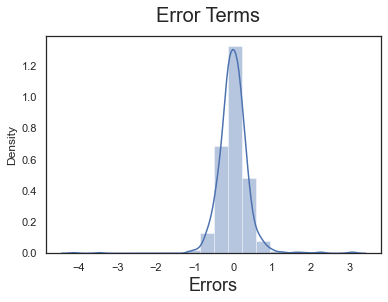

In [768]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)        

#### Evaluating R2 Value

In [769]:
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.83

In [770]:
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

169.08921080303355
0.16561137199121798
0.40695377131956645


In [771]:
y_res = (y_train - y_train_cnst)

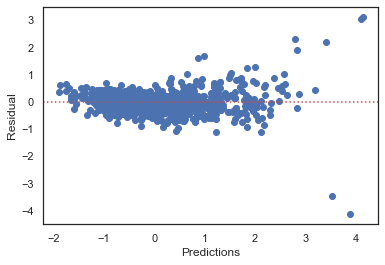

In [772]:
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction on Test data set

In [773]:
df_test[nums] = scaler.transform(df_test[nums])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,-0.760297,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,0.200990,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,-0.058305,-0.807668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [774]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1436 to 210
Columns: 142 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(42), uint8(100)
memory usage: 190.3 KB


In [775]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195

In [776]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [777]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [778]:
test_lm = sm.OLS(y_test,X_test_new).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.39e-156
Time:                        23:38:45   Log-Likelihood:                -209.74
No. Observations:                 439   AIC:                             467.5
Df Residuals:                     415   BIC:                             565.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1287      0.055     -2.359      0.019      -0.236      -0.021
OverallQual              0.2544      0.037      6.922      0.000       0.182       0.327
BsmtQual                 0.1489      0.035      4.306      0.000       0.081       0.217
BsmtExposure             0.1010      0.023      4.441      0.000       0.056       0.146
1stFlrSF                 0.3699      0.030     12.316      0.000       0.311       0.429
2ndFlrSF                 0.2678      0.025     10.828      0.000       0.219       0.316
KitchenQual              0.1231      0.027      4.515      0.000       0.070       0.177
MSSubClass_90           -0.3013      0.131     -2.291      0.022      -0.560      -0.043
MSSubClass_120          -0.3233      0.097     -3.343      0.001      -0.513      -0.133
MSSubClass_160          -0.3408      0.122     -2.800      0.005      -0.580      -0.102
MSSubClass_190          -0.0867      0.186     -0.466      0.641      -0.452       0.279
LotShape_IR3             0.0614      0.405      0.151      0.880      -0.735       0.858
MSZoning_RL              0.1106      0.057      1.931      0.054      -0.002       0.223
Neighborhood_BrDale      0.2934      0.233      1.260      0.209      -0.164       0.751
Neighborhood_Crawfor     0.2450      0.100      2.458      0.014       0.049       0.441
Neighborhood_Edwards    -0.0356      0.093     -0.385      0.701      -0.217       0.146
Neighborhood_NoRidge     0.5936      0.170      3.483      0.001       0.259       0.929
Neighborhood_NridgHt     0.8457      0.111      7.593      0.000       0.627       1.065
Neighborhood_Somerst     0.1970      0.098      2.017      0.044       0.005       0.389
Neighborhood_StoneBr     1.0547      0.129      8.163      0.000       0.801       1.309
Neighborhood_Veenker -4.137e-16   1.43e-16     -2.894      0.004   -6.95e-16   -1.33e-16
Exterior1st_BrkFace      0.1156      0.096      1.206      0.229      -0.073       0.304
Exterior2nd_Stucco       0.0074      0.172      0.043      0.966      -0.331       0.346
Foundation_Slab          0.4334      0.206      2.108      0.036       0.029       0.838
GarageType_Basment      -0.1291      0.164     -0.788      0.431      -0.451       0.193
==============================================================================
Omnibus:                       87.981   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.925
Skew:                           0.596   Prob(JB):                    3.79e-153
Kurtosis:                       9.079   Cond. No.                     5.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

#### Making predictions

In [779]:
y_pred = lm.predict(X_test_new)

### Evaluating Test Model

In [780]:
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.83

In [781]:
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

78.12382159302123
0.1779585913280666
0.4218513853575292


In [782]:
X_test_new = X_test_new.drop(['const'], axis=1)

In [783]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,3.34
1,BsmtQual,2.71
5,KitchenQual,2.03
3,1stFlrSF,2.00
8,MSSubClass_160,1.76
4,2ndFlrSF,1.67
22,Foundation_Slab,1.62
11,MSZoning_RL,1.48
16,Neighborhood_NridgHt,1.48
12,Neighborhood_BrDale,1.45


Text(0, 0.5, 'y_pred')

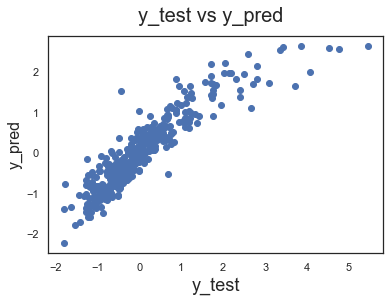

In [784]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [785]:
df = df[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [786]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.834388628008782
0.8271876178624071
169.08921080303355
78.12382159302123
0.16561137199121798
0.1779585913280666


### Ridge Regression

In [787]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [788]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,20,-0.222461,-0.251569,1
22,10,-0.219740,-0.252604,2
24,50,-0.227976,-0.252851,3
21,9,-0.219443,-0.252942,4
20,8,-0.219169,-0.253390,5
19,7,-0.218898,-0.253935,6
25,100,-0.232975,-0.254206,7
18,6,-0.218654,-0.254555,8
17,5,-0.218429,-0.255279,9
16,4,-0.218253,-0.256201,10


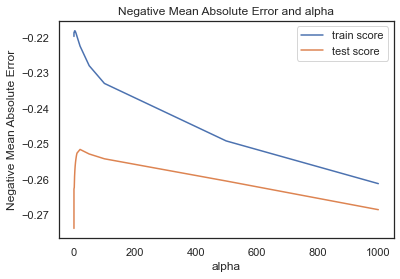

In [789]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [790]:
ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [791]:
ridge = Ridge(alpha=20)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.04871030520302497
Coefficients:
 [-0.01220962  0.04715204  0.19386481  0.05861496  0.00518896  0.07277219
  0.06699286  0.05590922  0.0899168   0.03690312  0.00456252 -0.00634838
 -0.00377153 -0.00142659  0.00283695  0.12101892  0.09158732 -0.01749766
  0.16394798  0.05069175  0.00737531  0.03857081  0.01511971 -0.01697816
 -0.05105369  0.0732028   0.03388351  0.00994099  0.02927554 -0.04594931
  0.11666258  0.01207705  0.01879732 -0.0091656   0.00418114  0.02026781
  0.01566798 -0.00613675  0.00265425 -0.00304952 -0.04752318  0.02636999
  0.0034197  -0.01526788 -0.00081727 -0.06877192 -0.0353697  -0.0012868
 -0.11274933 -0.07044323 -0.02671676 -0.17443431 -0.21246861 -0.05148278
 -0.06437631  0.01879767 -0.12872982  0.00871523  0.08690632 -0.0778656
 -0.02656039  0.00769452  0.0281724   0.03600491  0.07303555 -0.06411466
 -0.00622445  0.00110265  0.04454288  0.0214999  -0.08072707  0.14349805
 -0.16905336 -0.08903671 -0.01258907 -0.04219639 -0.07728294 -0.05197914
 -0.0

In [792]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=20.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=20.0):
 ****************************************

For Train Set:
R2 score: 0.8575943956994172 
MSE score: 0.14240560430058286 
MAE score: 0.2227237363333244 
RMSE score: 0.37736667089262516

For Test Set:
R2 score: 0.8523231804725492 
MSE score: 0.1520745125426828 
MAE score: 0.24770984480962793 
RMSE score: 0.3899673224036635 
 ****************************************


In [793]:
##Creating a dataframe of features and coefficients
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order 
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,Neighborhood_NoRidge,0.3122,0.3122
1,Neighborhood_NridgHt,0.2869,0.2869
2,MSSubClass_160,-0.2125,0.2125
3,OverallQual,0.1939,0.1939
4,MSSubClass_120,-0.1744,0.1744
5,Neighborhood_Edwards,-0.1691,0.1691
6,GrLivArea,0.1639,0.1639
7,Neighborhood_Crawfor,0.1435,0.1435
8,LotShape_IR3,-0.1287,0.1287
9,1stFlrSF,0.1210,0.1210


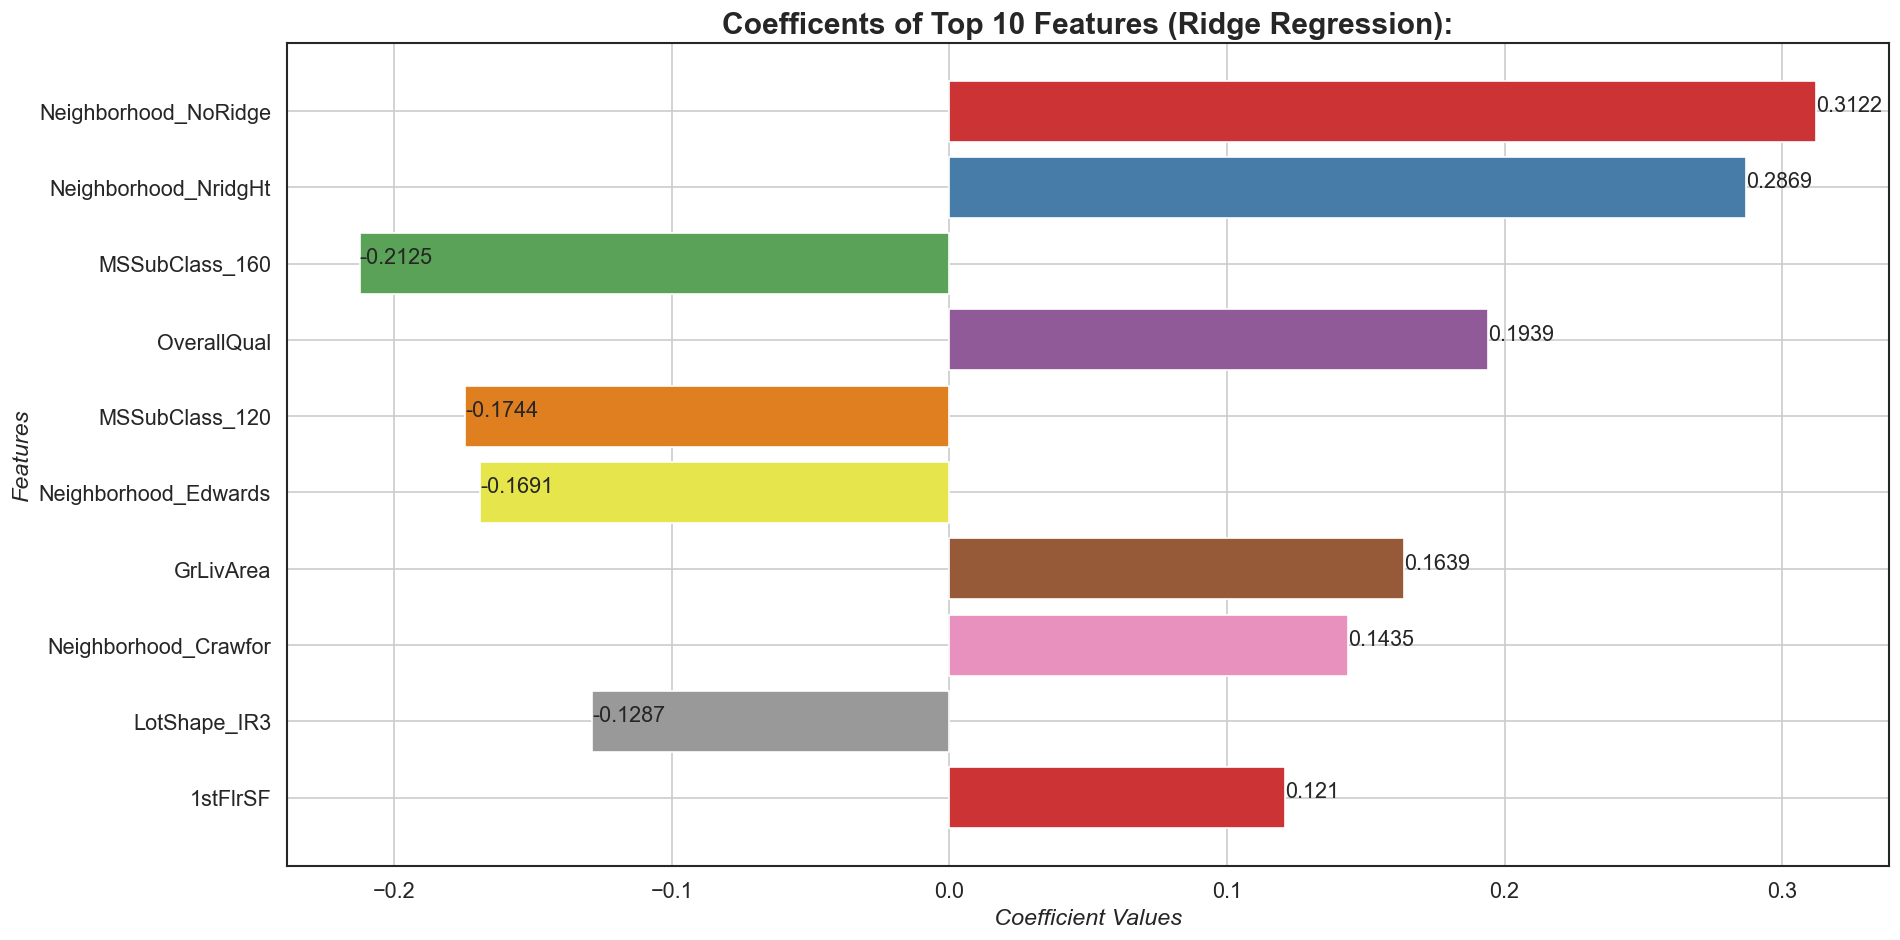

In [794]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

#### Residual Analysis of Model

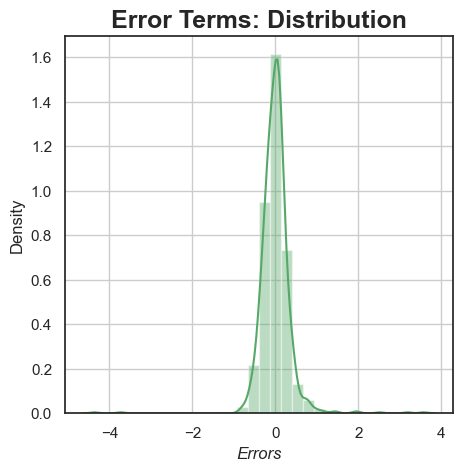

In [795]:
# Train set analysis

sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

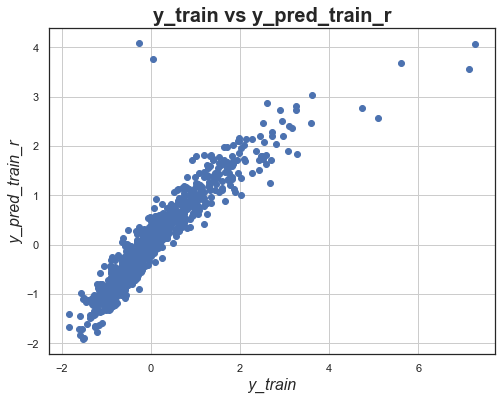

In [796]:
# Plotting y_train and y_train_pred
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [797]:
y_train.shape

(1021,)

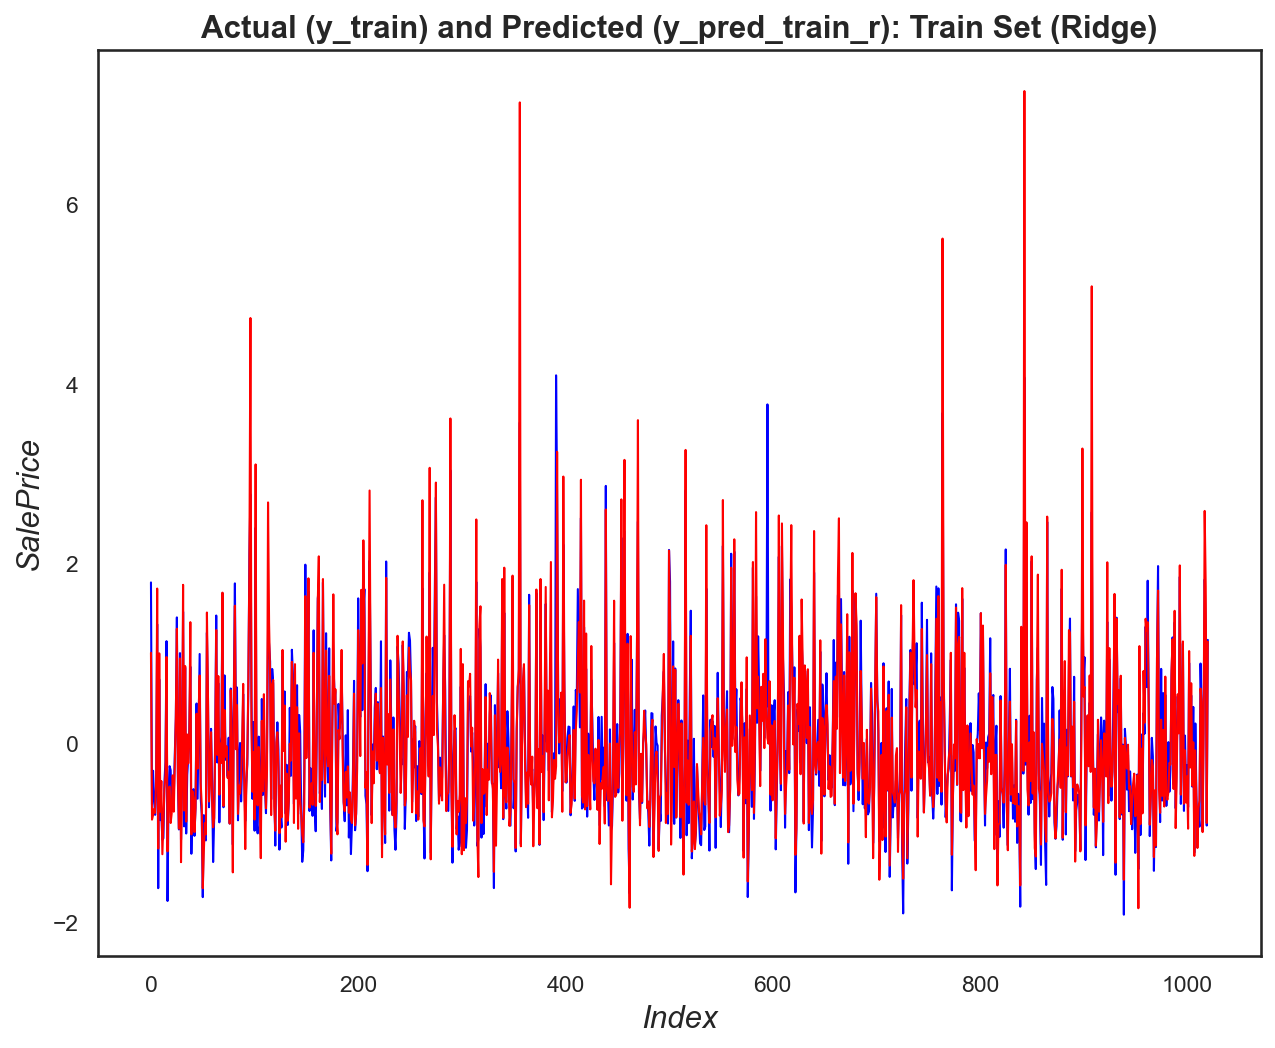

In [798]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,8), dpi=150)
f = [i for i in range(0,1021,1)] #Since y_train has 1021 observations
g = [i for i in range(0,1021,1)]
plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

- Blue: Predicted (y_pred_train_l)
- Red: Actual (y_train)

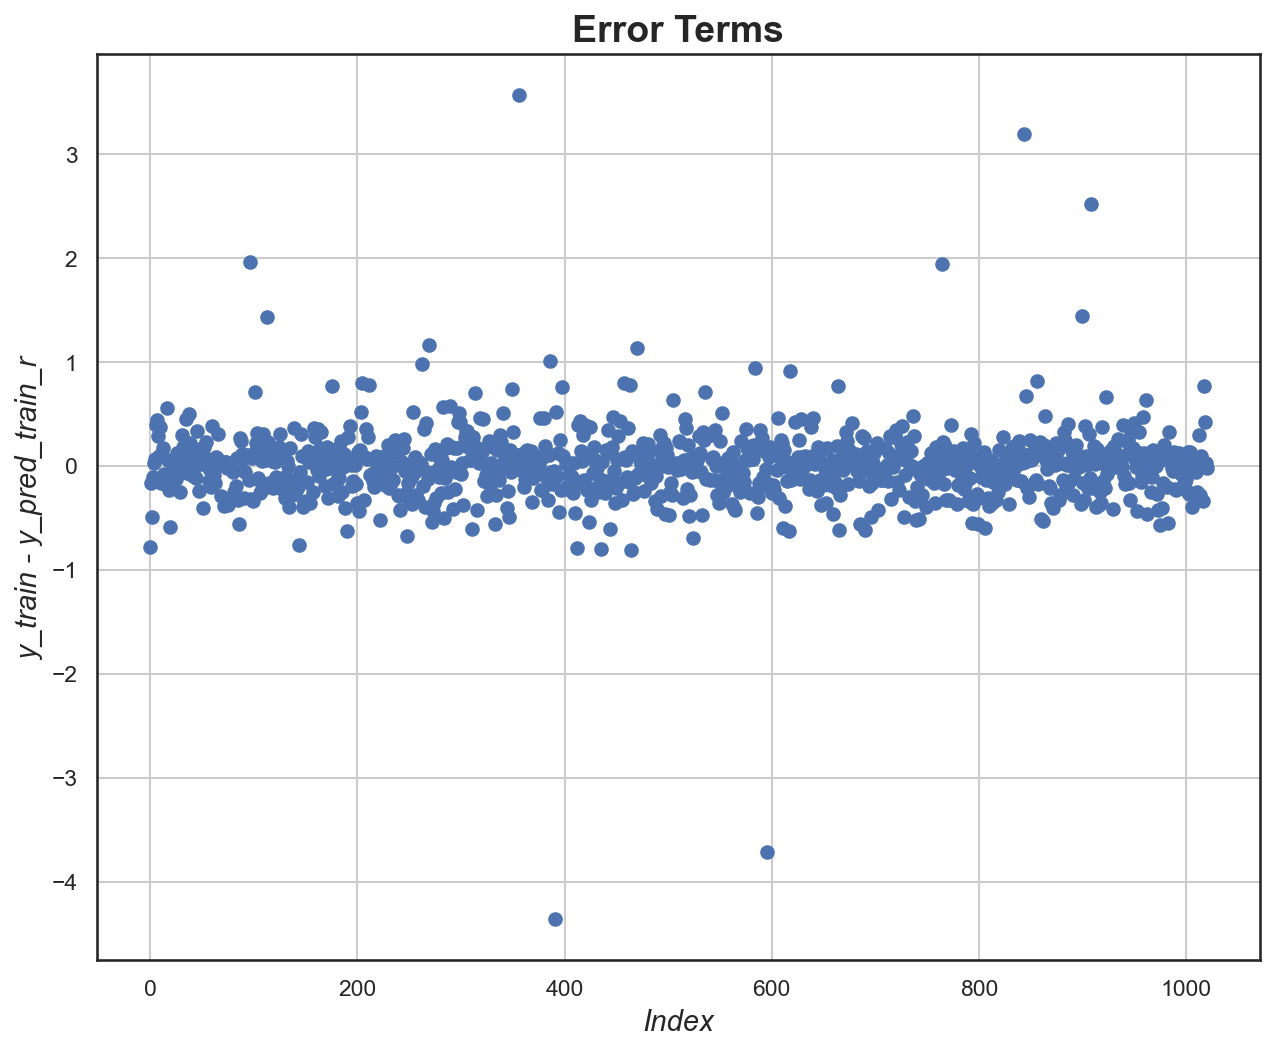

In [799]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (10,8), dpi=150)
j = [i for i in range(0,1021,1)] #For 1021 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

In [800]:
## For test Set

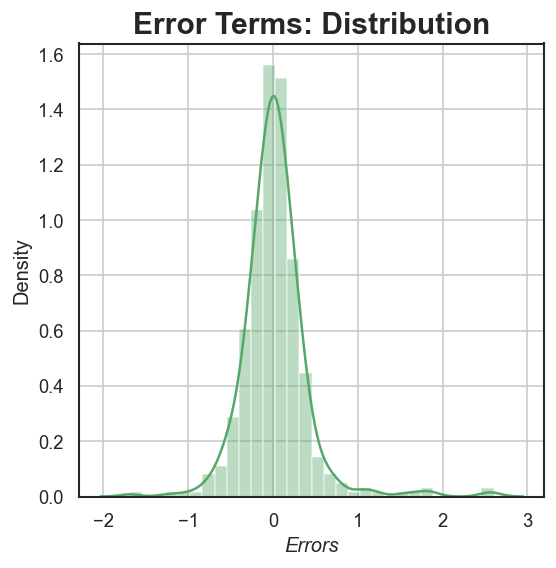

In [801]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=120)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

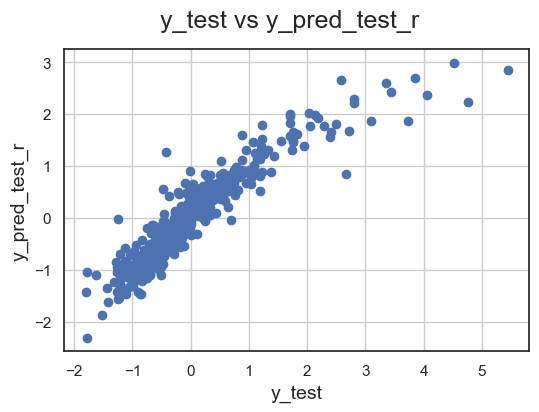

In [802]:
# Plotting y_test and y_pred_test_r
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [803]:
y_test.shape

(439,)

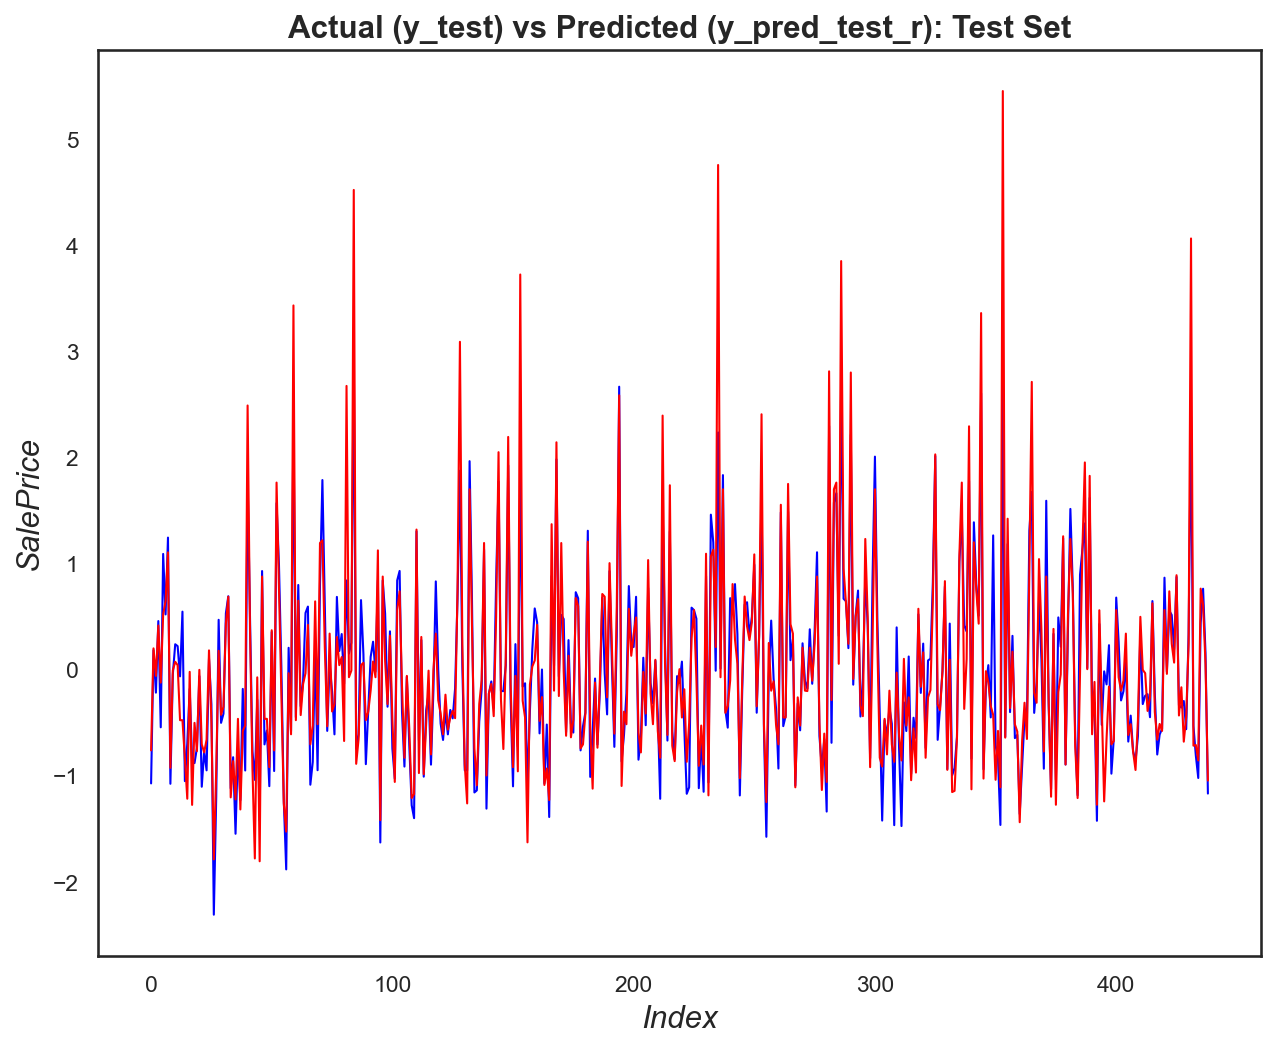

In [804]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,8), dpi=150)
p = [i for i in range(0,439,1)] #As test set has 439 observations
l = [i for i in range(0,439,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

- Blue: Predicted (y_pred_train_l)
- Red: Actual (y_train)

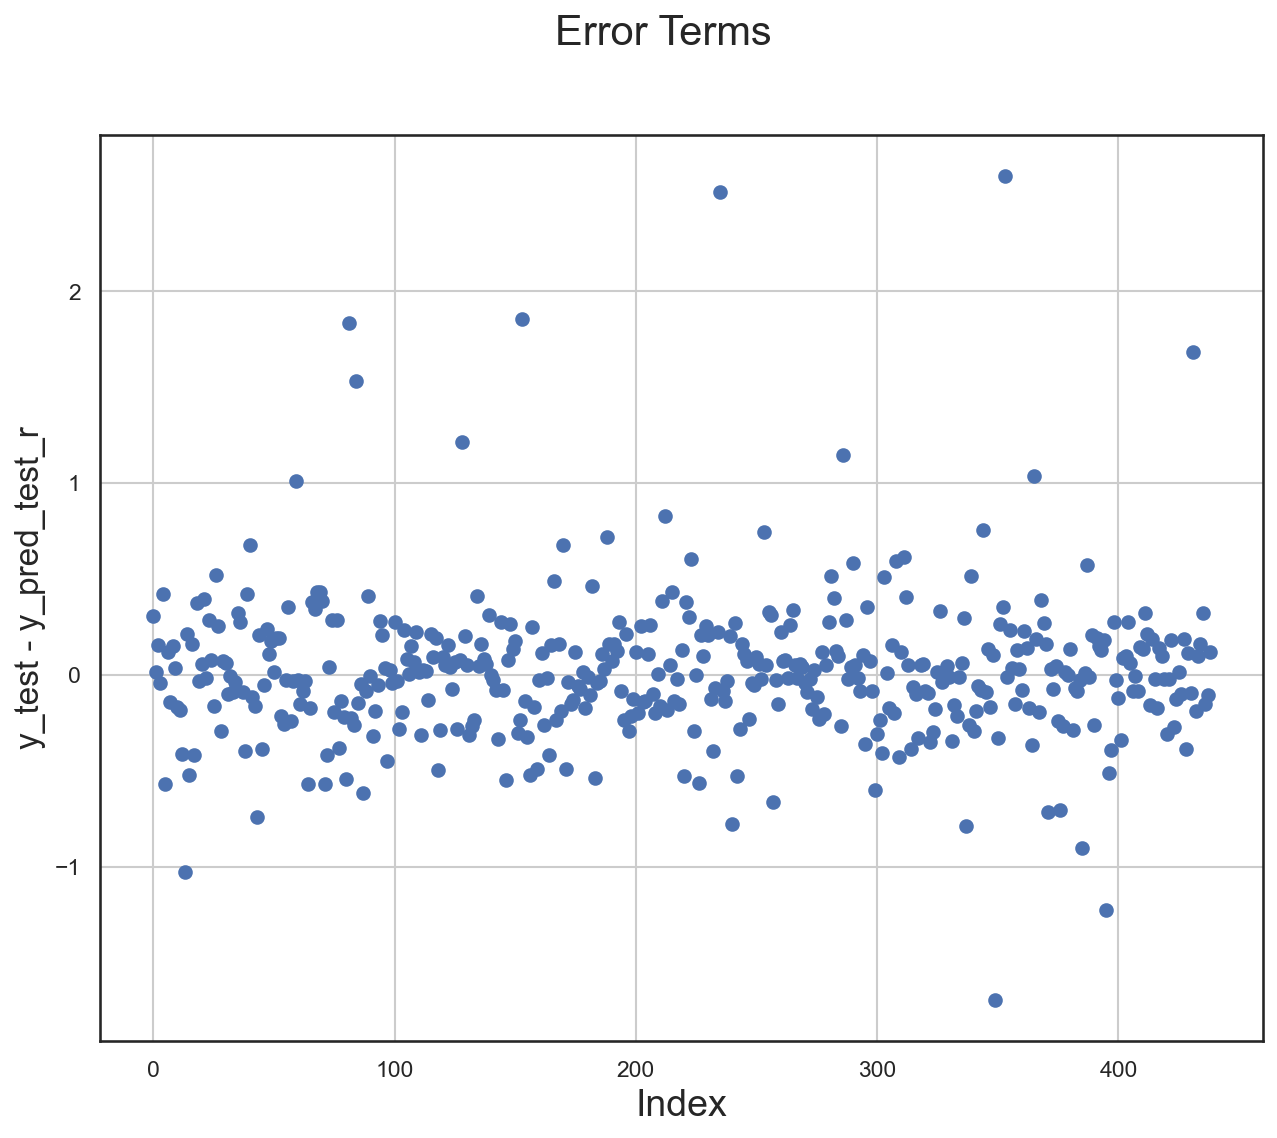

In [805]:
# Error terms
fig = plt.figure(figsize=(10,8), dpi=150)
o = [i for i in range(0,439,1)] #For 439 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

## Lasso Regression

In [806]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [807]:

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
11,0.003,-0.225415,-0.250688,1
10,0.002,-0.222803,-0.251362,2
12,0.004,-0.227901,-0.252287,3
13,0.005,-0.230679,-0.253886,4
9,0.001,-0.220206,-0.254453,5
8,0.0009,-0.219989,-0.254936,6
7,0.0008,-0.219874,-0.255492,7
6,0.0007,-0.219819,-0.256349,8
5,0.0006,-0.219784,-0.257395,9
4,0.0005,-0.219816,-0.258601,10


In [808]:
lasso = Lasso()
params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                      0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [809]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,0.003,-0.225415,-0.250688,1
11,0.002,-0.222803,-0.251362,2
13,0.005,-0.230679,-0.253886,3
10,0.001,-0.220206,-0.254453,4
9,0.0009,-0.219989,-0.254936,5
8,0.0008,-0.219874,-0.255492,6
7,0.0007,-0.219819,-0.256349,7
6,0.0006,-0.219784,-0.257395,8
5,0.0005,-0.219816,-0.258601,9
4,0.0004,-0.219821,-0.259813,10


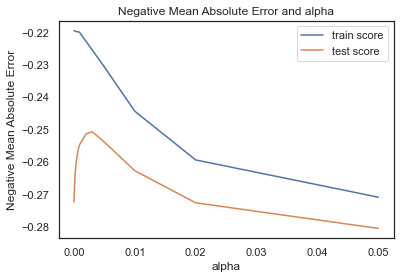

In [810]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [811]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [812]:
lasso = Lasso(alpha=0.003)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.044434664603541396
Coefficients:
  [-1.65629693e-02  4.42890173e-02  2.00299921e-01  5.81548953e-02
  7.38567316e-05  6.24924199e-02  6.37818658e-02  4.15889519e-02
  8.81730351e-02  3.39977793e-02  5.12746466e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.23684846e-03  5.65894877e-02
  0.00000000e+00 -2.10189144e-02  2.68174189e-01  4.74940557e-02
  6.65547396e-03  2.75257256e-02  9.94227797e-03 -1.43801483e-02
 -5.14176800e-02  7.75381429e-02  1.80362354e-02  8.77833228e-03
  2.65519036e-02 -3.88316923e-02  1.15570748e-01  0.00000000e+00
  1.73955414e-02 -5.11609732e-03 -0.00000000e+00  1.80284412e-02
  1.64956640e-02 -3.95877717e-03  1.35591406e-03 -4.70004598e-04
 -4.86674084e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.06341101e-02 -0.00000000e+00  0.00000000e+00
 -7.85386912e-02 -0.00000000e+00 -0.00000000e+00 -1.71643493e-01
 -2.34977878e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.51703548e-02  0.00000000e+00  5.7690

In [813]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.003):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.003):
 ****************************************

For Train Set:
R2 score: 0.8540112695899239 
MSE score: 0.1459887304100761 
MAE score: 0.22653243394644185 
RMSE score: 0.38208471627386

For Test Set:
R2 score: 0.8481650142241087 
MSE score: 0.1563565055279494 
MAE score: 0.24755630114301627 
RMSE score: 0.39541940459207287 
 ****************************************


In [814]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  


lasso_df.head(10)  #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Neighborhood_NoRidge,0.5336,0.5336
1,Neighborhood_NridgHt,0.4480,0.4480
2,GrLivArea,0.2682,0.2682
3,MSSubClass_160,-0.2350,0.2350
4,OverallQual,0.2003,0.2003
5,Neighborhood_Somerst,0.1928,0.1928
6,Neighborhood_Crawfor,0.1844,0.1844
7,MSSubClass_120,-0.1716,0.1716
8,Exterior1st_BrkFace,0.1253,0.1253
9,Neighborhood_Edwards,-0.1184,0.1184


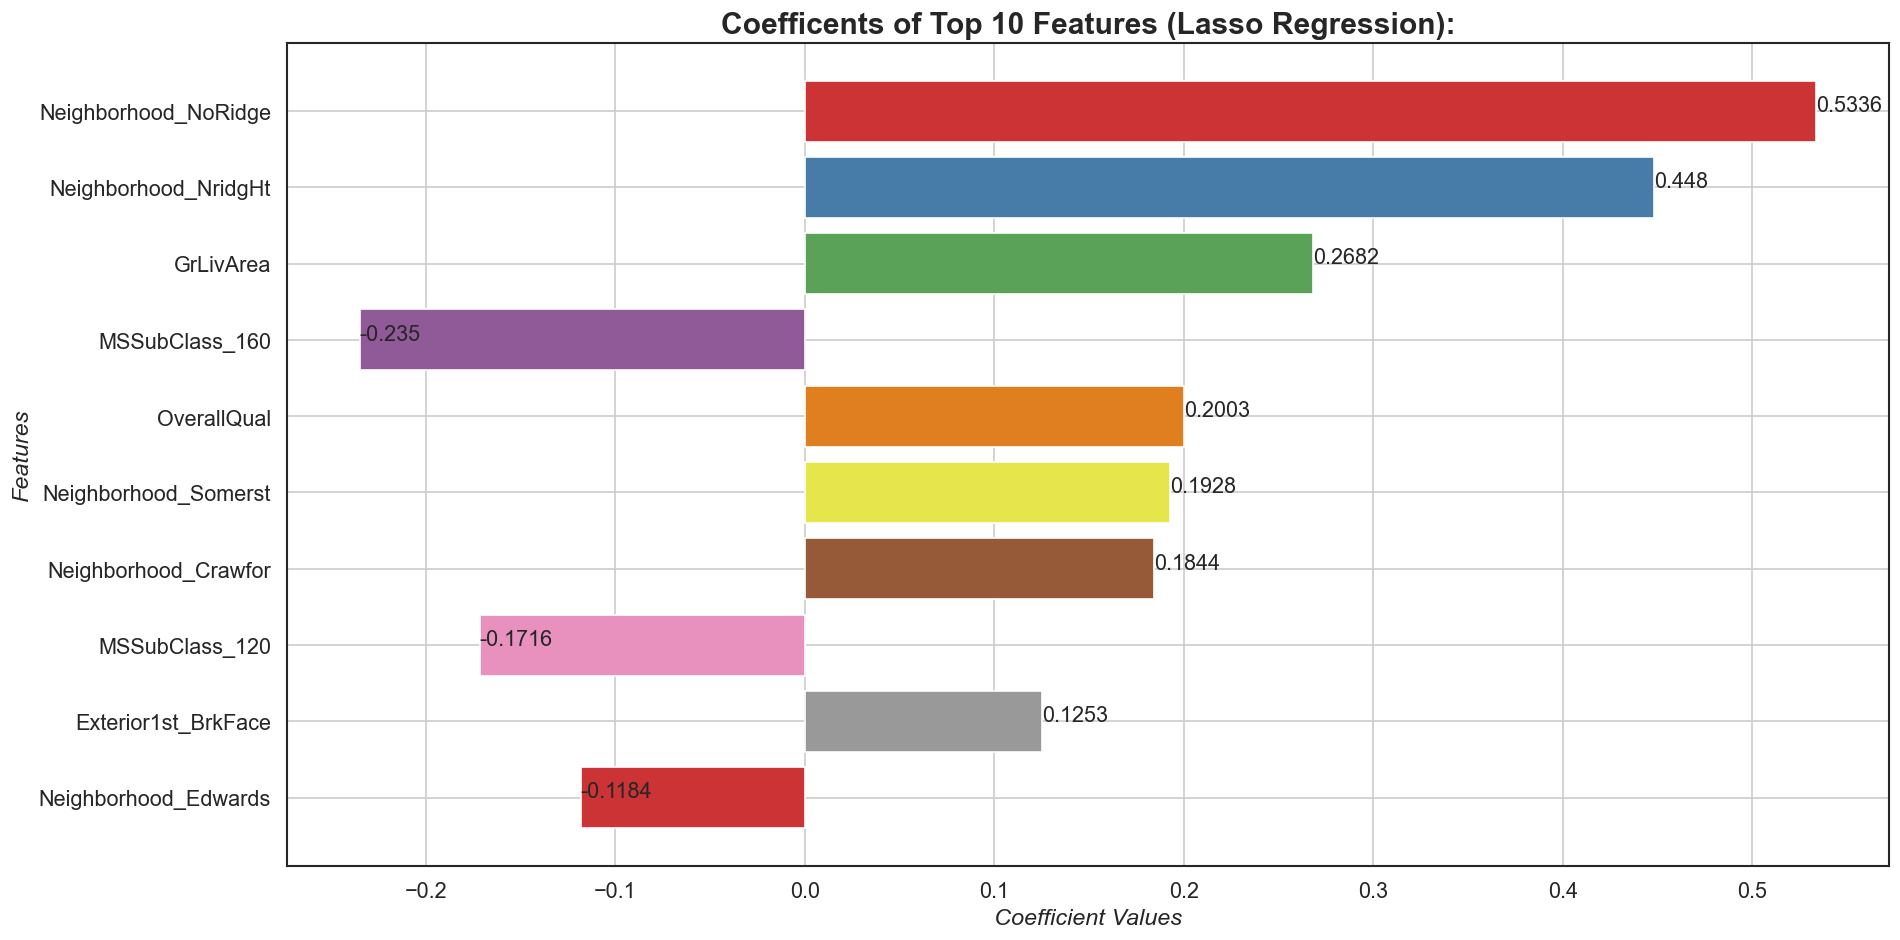

In [815]:
top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [816]:
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'GrLivArea',
 'MSSubClass_160',
 'OverallQual']

## Residual Analysis

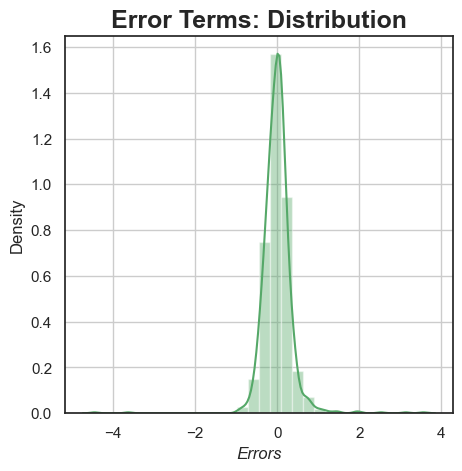

In [817]:
## For Training set
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

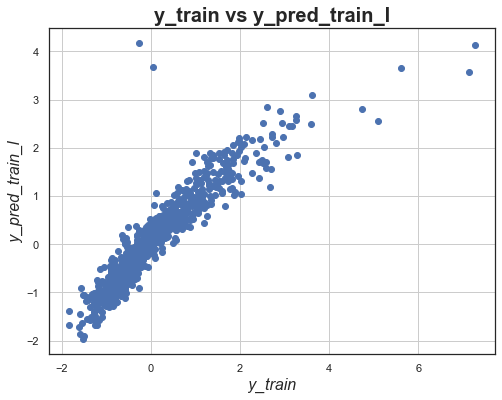

In [818]:
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [819]:
y_train.shape

(1021,)

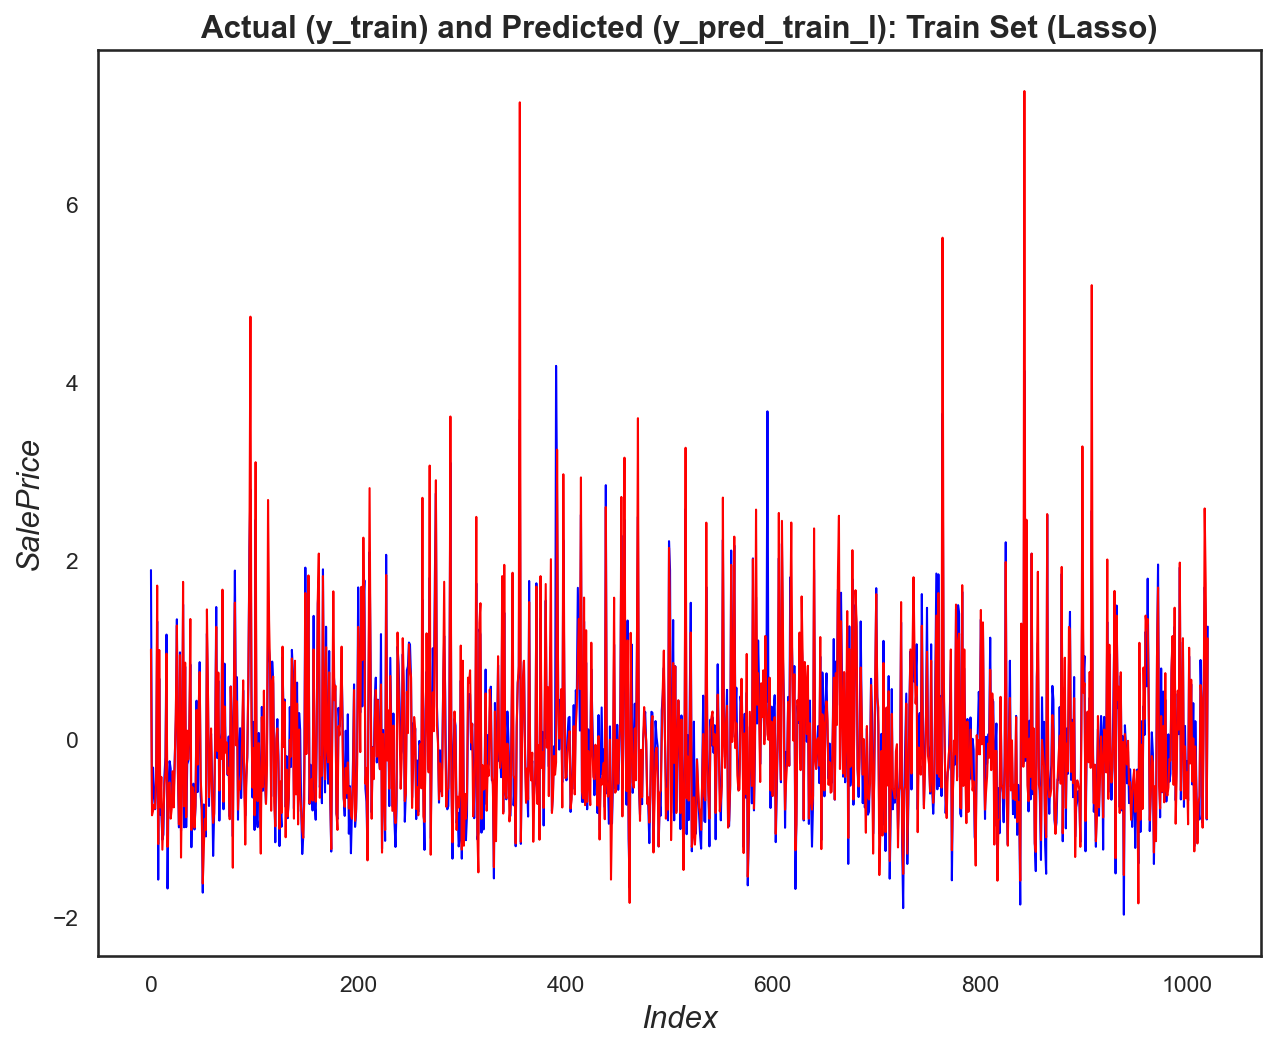

In [820]:
sns.set_style('white')
plt.figure(figsize = (10,8), dpi=150)
f1 = [i for i in range(0,1021,1)] #Since y_train has 1021 observations
g1 = [i for i in range(0,1021,1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

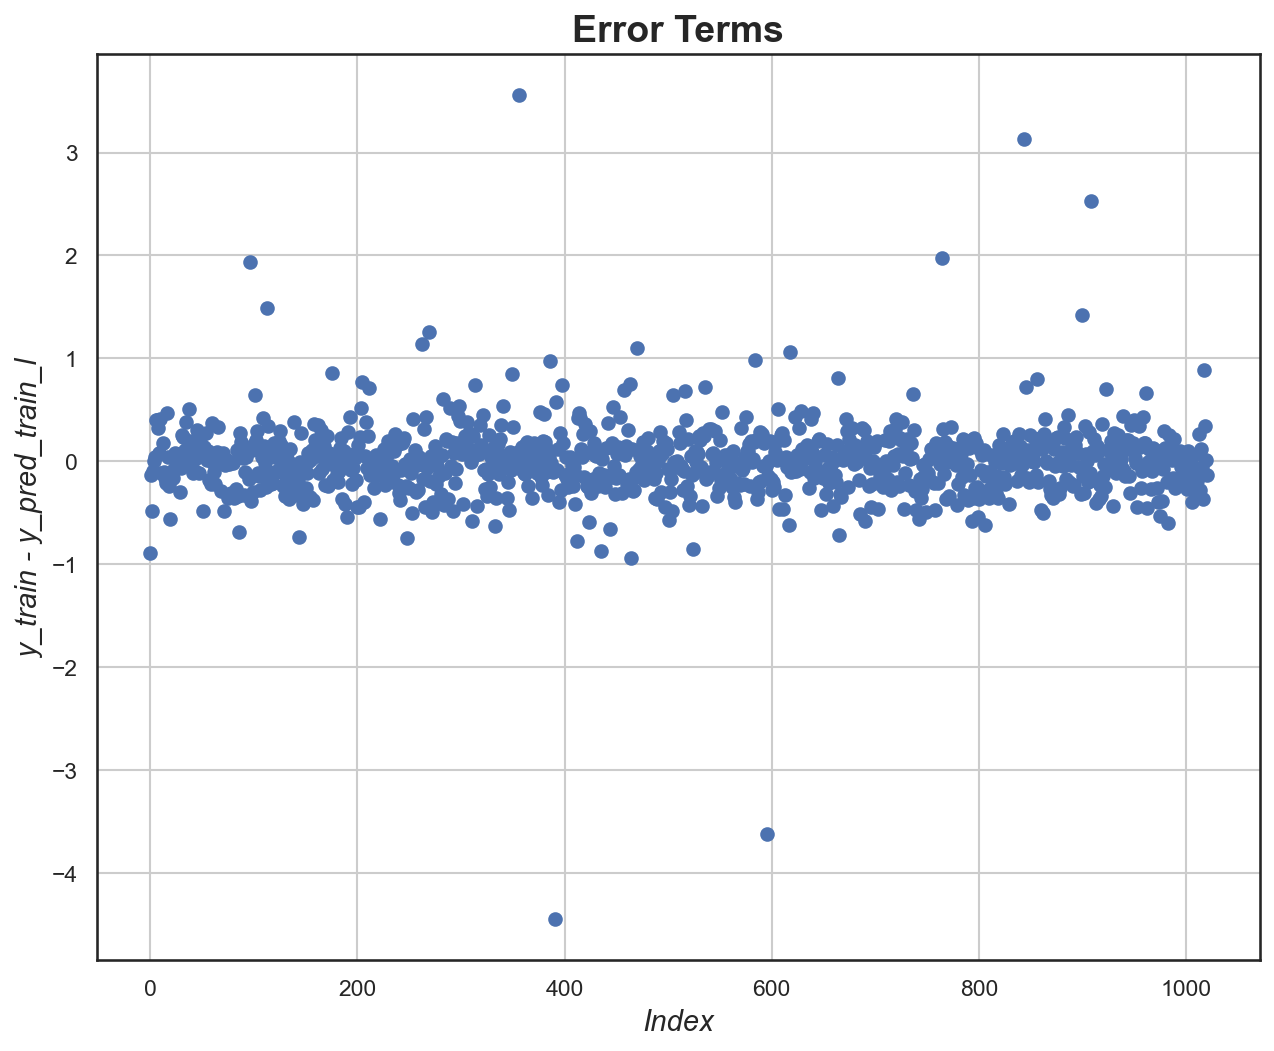

In [821]:
sns.set_style('white')
plt.figure(figsize = (10,8), dpi=150)
j1 = [i for i in range(0,1021,1)] #For 1021 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

- Blue: Predicted (y_pred_train_l)
- Red: Actual (y_train)

In [822]:
## Test set analysis

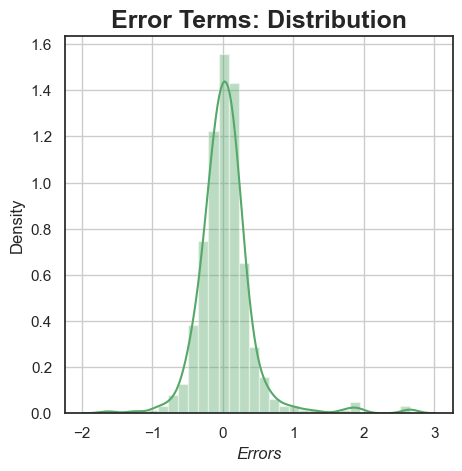

In [823]:
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

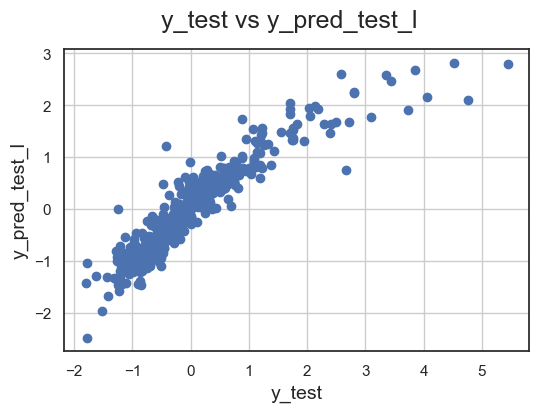

In [824]:
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()


In [825]:
y_test.shape

(439,)

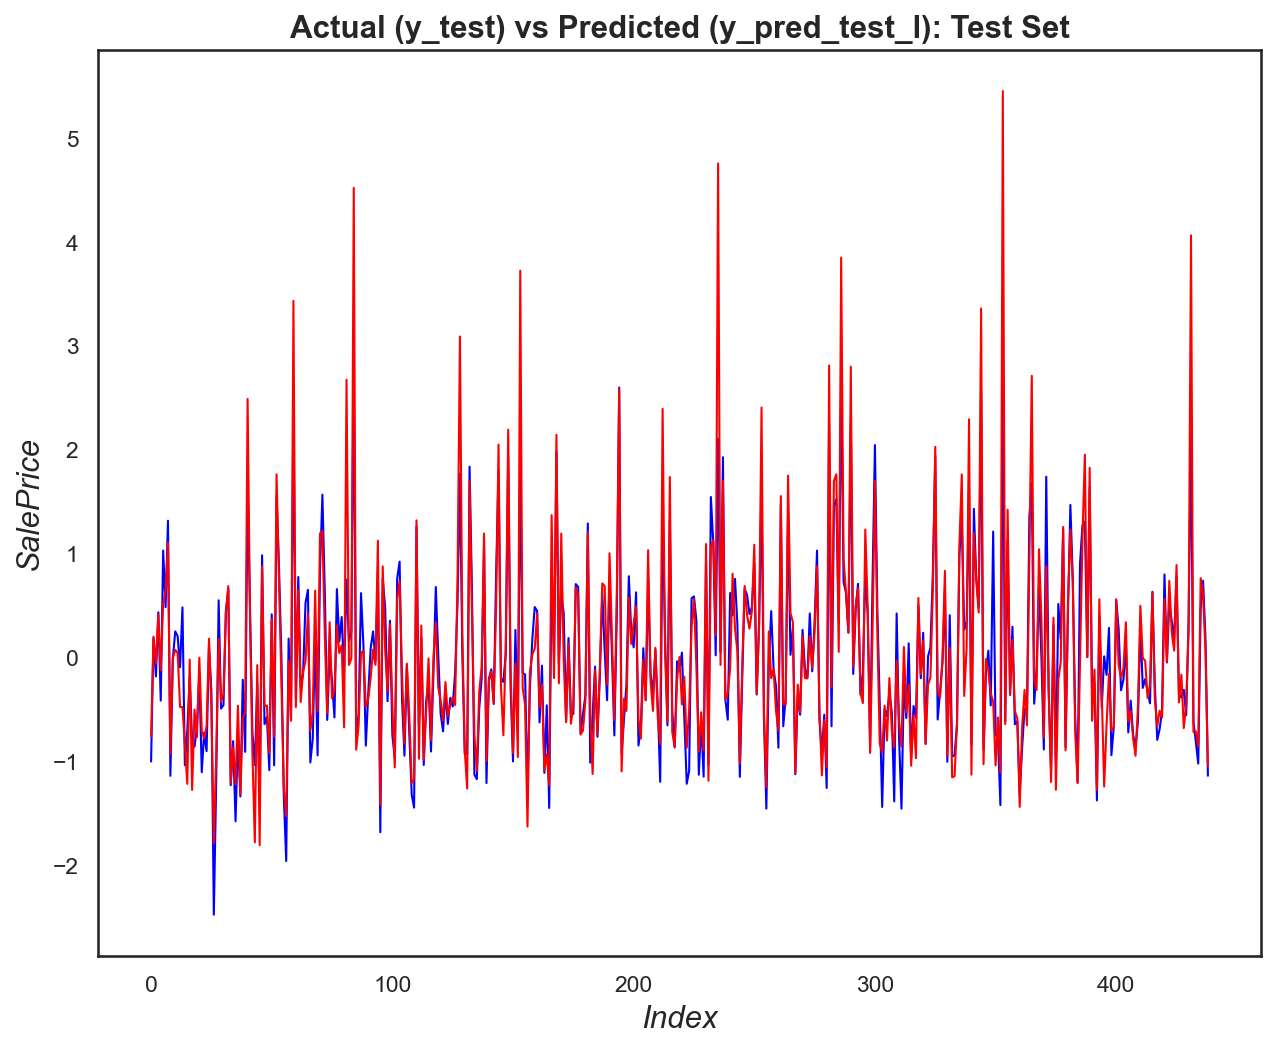

In [826]:
plt.figure(figsize = (10,8), dpi=150)
p2 = [i for i in range(0,439,1)] #As test set has 415 observations
l2 = [i for i in range(0,439,1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

- Blue: Predicted (y_pred_train_l)
- Red: Actual (y_train)

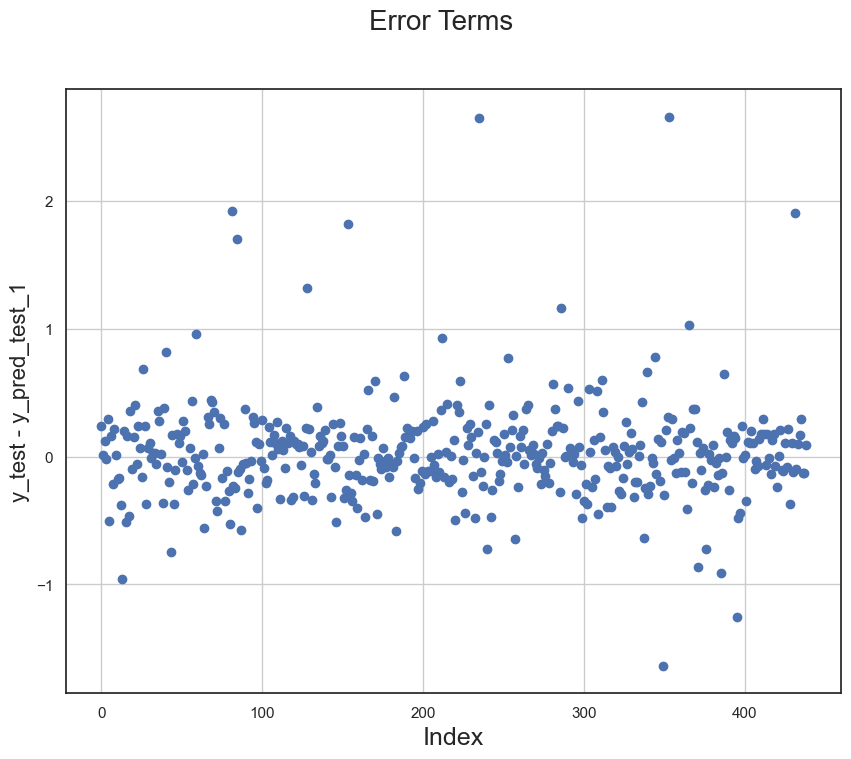

In [827]:
fig = plt.figure(figsize=(10,8), dpi=100)
o1 = [i for i in range(0,439,1)] #For 439 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

### Subjective Answers

Question1

Changes to the model when we double the value of alpha for both ridge and lasso regression

In [828]:
ridge = Ridge(alpha=40)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.0334080842573514
Coefficients:
 [-6.91306501e-03  4.55450362e-02  1.92634240e-01  5.78341218e-02
  5.72011533e-03  7.69655108e-02  7.30179674e-02  5.04906075e-02
  8.62120624e-02  3.82789565e-02  9.18321463e-03 -4.54179278e-03
 -6.82162518e-04  6.94663222e-03  4.61960654e-03  1.18508916e-01
  8.19723990e-02 -1.60750374e-02  1.54326033e-01  4.70259588e-02
  4.46560742e-03  3.80222056e-02  1.57348990e-02 -1.51565815e-02
 -5.09177613e-02  7.64917453e-02  3.90498784e-02  1.21377349e-02
  3.29406708e-02 -4.57727317e-02  1.09037767e-01  2.45029660e-02
  1.99296731e-02 -9.13609034e-03  3.37561644e-03  1.93549547e-02
  1.54895894e-02 -9.10957575e-03  2.46255680e-03 -1.84193924e-03
 -4.16862158e-02  1.60040756e-02  3.01196825e-03 -5.92116017e-03
  8.84810260e-03 -3.05195538e-02 -1.28680385e-02  9.80750581e-04
 -8.16916615e-02 -4.14636039e-02 -1.26713838e-02 -1.15534667e-01
 -1.33149888e-01 -2.34781292e-02 -3.87416425e-02  1.50018237e-02
 -8.22131909e-02  2.76680736e-03  7.1486975

In [829]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=20*2=40):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=20*2=40):
 ****************************************

For Train Set:
R2 score: 0.8497925887475557 
MSE score: 0.15020741125244433 
MAE score: 0.22629763161307567 
RMSE score: 0.38756600889712234

For Test Set:
R2 score: 0.8506943511998044 
MSE score: 0.15375184699815483 
MAE score: 0.2503549435424015 
RMSE score: 0.392112033732905 
 ****************************************


In [830]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,Neighborhood_NoRidge,0.2241,0.2241
1,Neighborhood_NridgHt,0.1974,0.1974
2,OverallQual,0.1926,0.1926
3,GrLivArea,0.1543,0.1543
4,MSSubClass_160,-0.1331,0.1331
5,Neighborhood_Edwards,-0.1301,0.1301
6,1stFlrSF,0.1185,0.1185
7,MSSubClass_120,-0.1155,0.1155
8,GarageCars,0.1090,0.1090
9,Neighborhood_Crawfor,0.1022,0.1022


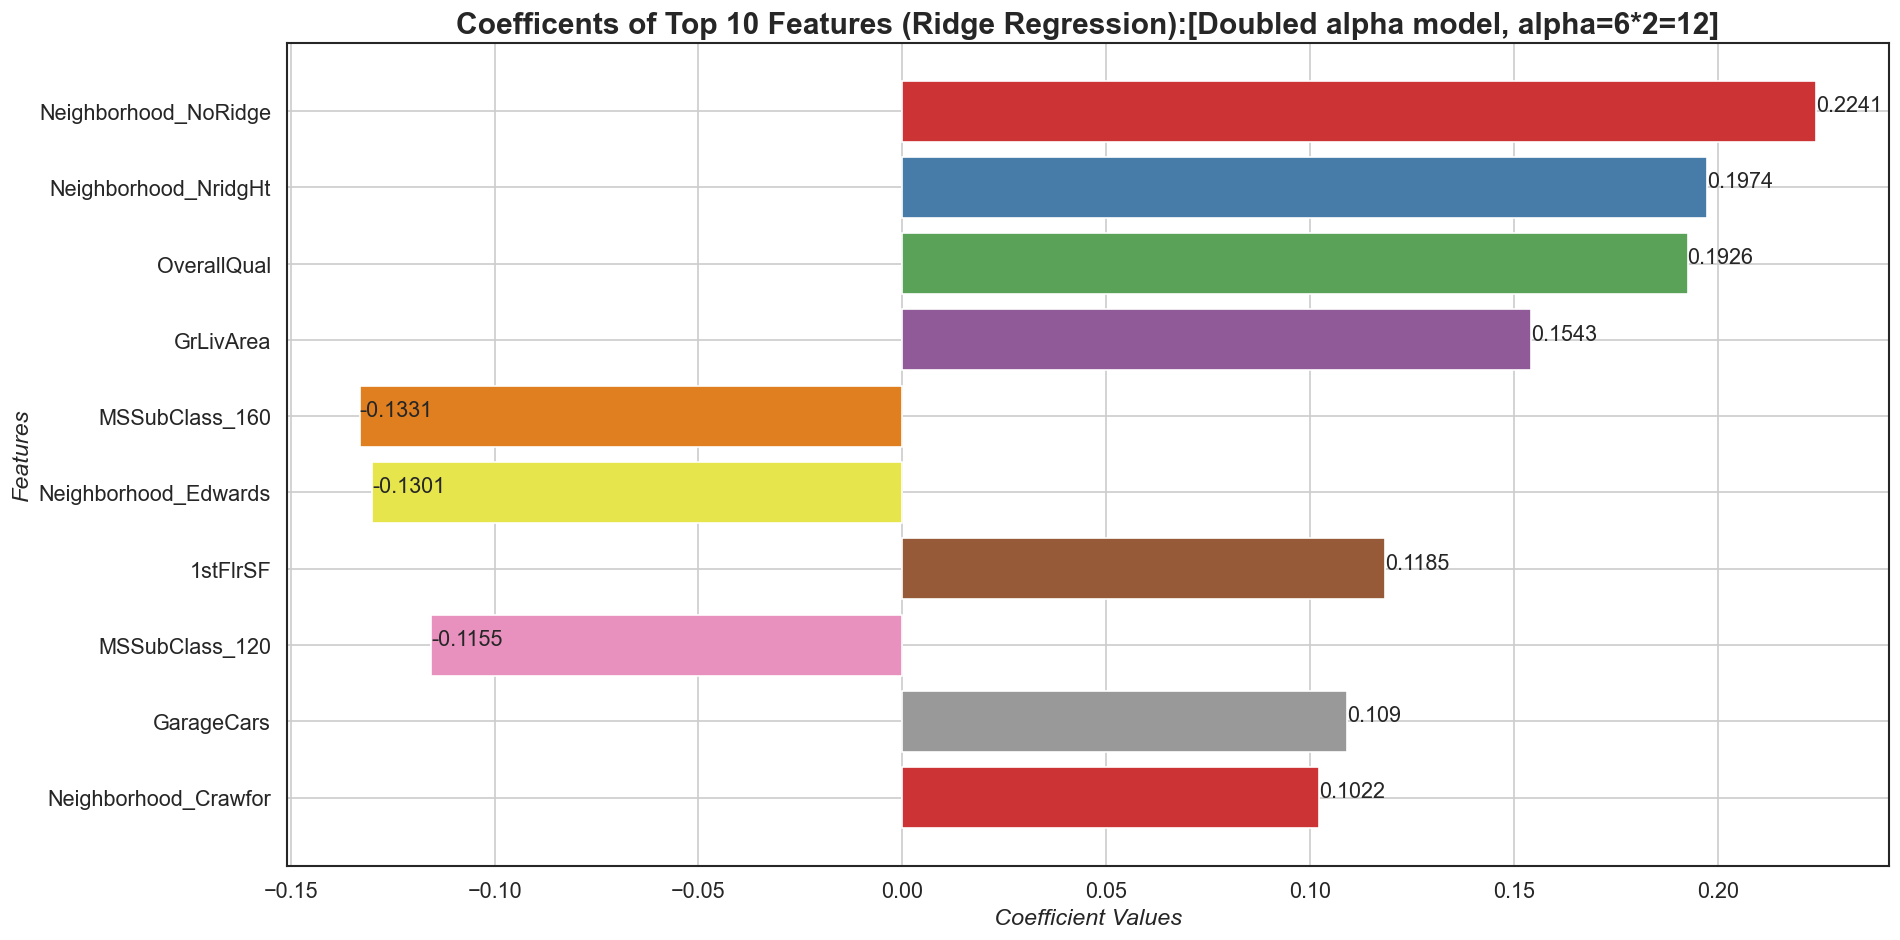

In [831]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=6*2=12]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [832]:
print("For Ridge Regression (Doubled alpha model, alpha=8*2=16): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=8*2=16): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'OverallQual', 'GrLivArea', 'MSSubClass_160', 'Neighborhood_Edwards', '1stFlrSF', 'MSSubClass_120', 'GarageCars', 'Neighborhood_Crawfor'] 
 *****************************************************************************************************************************


#### Lasso Regression



In [833]:
lasso = Lasso(alpha=0.006)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.02414029563317584
Coefficients:
  [-0.          0.04583106  0.21607355  0.05433205  0.0007878   0.05924069
  0.06980757  0.04314234  0.08358925  0.03469711  0.00738696 -0.
 -0.          0.          0.00686424  0.06797047  0.         -0.01663175
  0.26041877  0.04254562  0.          0.01772503  0.00573194 -0.
 -0.04530199  0.08285862  0.01116505  0.00589141  0.03702922 -0.04039446
  0.12026978  0.          0.0156578  -0.         -0.          0.01493729
  0.01421324 -0.01043406  0.         -0.         -0.04600697  0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.00582643 -0.         -0.         -0.0529936  -0.09017529 -0.
 -0.          0.         -0.         -0.          0.02562753 -0.
 -0.          0.          0.          0.          0.         -0.09429479
 -0.         -0.          0.          0.         -0.          0.06582329
 -0.07521587 -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.40673401  0.29222986 -0.      

In [834]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.003*2 = 0.006)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.003*2 = 0.006)
 ****************************************

For Train Set:
R2 score: 0.8408634254613427 
MSE score: 0.15913657453865734 
MAE score: 0.23646689090161446 
RMSE score: 0.398919258169692

For Test Set:
R2 score: 0.8398659632267915 
MSE score: 0.1649026953702169 
MAE score: 0.25670474123831694 
RMSE score: 0.4060821288486073 
 ****************************************


In [835]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Neighborhood_NoRidge,0.4067,0.4067
1,Neighborhood_NridgHt,0.2922,0.2922
2,GrLivArea,0.2604,0.2604
3,OverallQual,0.2161,0.2161
4,GarageCars,0.1203,0.1203
5,MSZoning_RM,-0.0943,0.0943
6,MSSubClass_160,-0.0902,0.0902
7,BsmtExposure,0.0836,0.0836
8,KitchenQual,0.0829,0.0829
9,Neighborhood_Edwards,-0.0752,0.0752


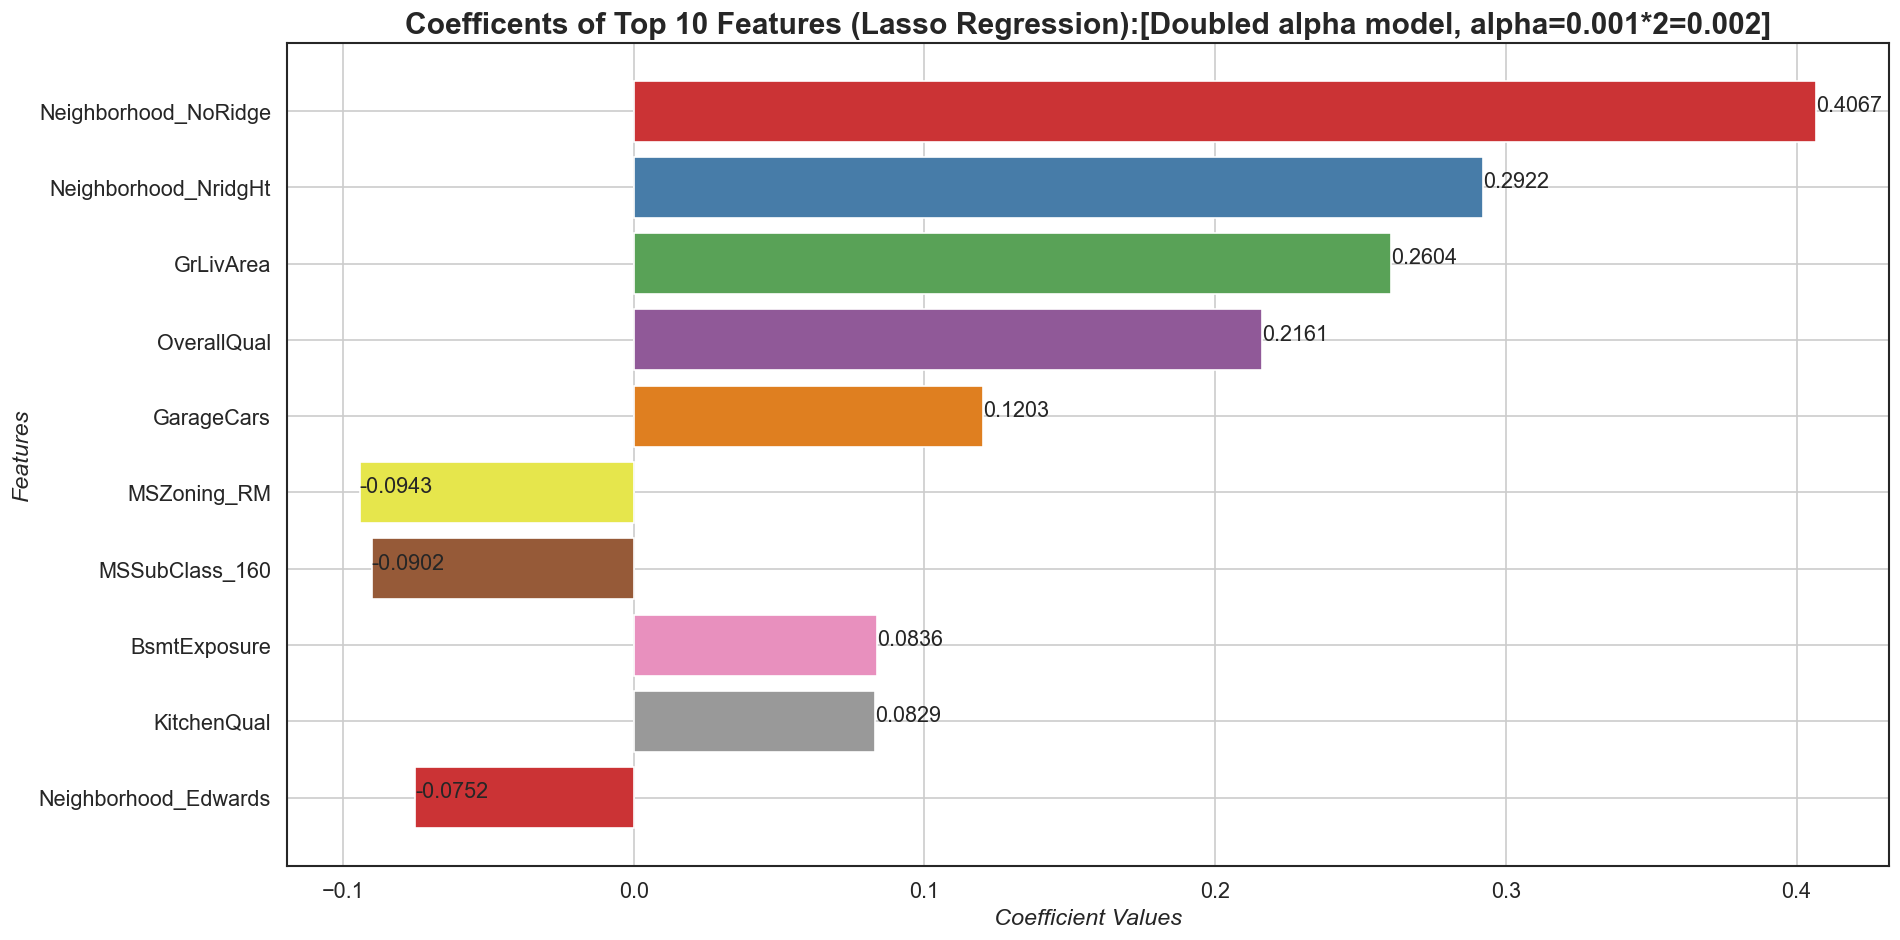

In [836]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.001*2=0.002]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [837]:
print("For Lasso Regression (Doubled alpha model: alpha:0.003*2 = 0.006): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.003*2 = 0.006): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'GrLivArea', 'OverallQual', 'GarageCars', 'MSZoning_RM', 'MSSubClass_160', 'BsmtExposure', 'KitchenQual', 'Neighborhood_Edwards'] 
 *****************************************************************************************************************************


In [853]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_features)

df= df1

##Removing these top5 features (as per Original Lasso Model) from 'df'
df= df.drop(top5_original_lasso_features, axis=1)
df.head()

Top 5 features in original lasso model (dropped):
 ['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'GrLivArea', 'MSSubClass_160', 'OverallQual']


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,ageOfHouse,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,10